# 04-comparing-FS-versions-on-same-dataset.ipynb

Using `ibs-brain` conda environment

Arvid Lundervold

Last updated: 2024-12-03


Comparing FreeSurfer v 6.0.1 (cross-sectional) and version 7.4.1 (cross-sectional) on the Bergen cohort with 78 participants.<br>

The files<br>
- `all_subjects_measure_fs7_cros_sectional.csv`, 
- `all_subjects_measures_fs7_longitudinal_stream.csv`,and 
- `all_subjects_measures_fs6.csv`(cross-sectional) 

are produced by `compare_FSversions_al.ipynb` (in the `ibs-brain-dev`repo, only)<br>
and further saved to:<br> 
- `../data/fs7_cross_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv`, 
- `../data/fs7_long_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv`, and 
- `../data/fs6_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv`, 

respectively.


### Example stats file (BGA_046)

#### FS v 6.0.1
_CROSS-SECTIONAL_:

**BG_046_20190531_0825_aseg.stats:**<br>
Measure EstimatedTotalIntraCranialVol, eTIV, Estimated Total Intracranial Volume, 1656739.304977, mm^3<br>
ColHeaders  Index SegId NVoxels Volume_mm3 StructName normMean normStdDev normMin normMax normRange  <br>
  1   4      9213     9541.5  Left-Lateral-Ventricle            24.1233    13.2426     0.0000    84.0000    84.0000 

#### FS v 7.4.1
_CROSS-SECTIONAL_:

**BG_046_20190531_0825_long_aseg.stats:**<br>
Measure EstimatedTotalIntraCranialVol, eTIV, Estimated Total Intracranial Volume, 1736077.544622, mm^3<br>
ColHeaders  Index SegId NVoxels Volume_mm3 StructName normMean normStdDev normMin normMax normRange  <br>
  1   4      9302     9565.0  Left-Lateral-Ventricle            26.6249    13.3030     4.0000    86.0000    82.0000 

_LONGITUDINAL STREAM_:

**BG_046_20190531_0825.long.BG_004_base_long_aseg.stats:**<br>
Measure EstimatedTotalIntraCranialVol, eTIV, Estimated Total Intracranial Volume, 1743418.965710, mm^3<br>
ColHeaders  Index SegId NVoxels Volume_mm3 StructName normMean normStdDev normMin normMax normRange  <br>
  1   4      8783     8991.8  Left-Lateral-Ventricle            22.3853    12.3294     0.0000    70.0000    70.0000 


In [20]:
import os
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

home = os.path.expanduser('~')
%matplotlib inline

In [21]:
if platform.system() == 'Darwin':
    print(f'OK, you are running on MacOS ({platform.version()})')
if platform.system() == 'Linux':
    print(f'OK, you are running on Linux ({platform.version()})')
if platform.system() == 'Windows':
    print(f'OK, but consider to install WSL for Windows10/11 since you are running on {platform.system()}')
    print('Check https://docs.microsoft.com/en-us/windows/wsl/install')

OK, you are running on MacOS (Darwin Kernel Version 24.1.0: Thu Oct 10 21:02:27 PDT 2024; root:xnu-11215.41.3~2/RELEASE_X86_64)


In [22]:
df_fs6_cross = pd.read_csv('../data/fs6_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv')
df_fs7_cross = pd.read_csv('../data/fs7_cross_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv')
df_fs7_long = pd.read_csv('../data/fs7_long_aseg_stats_for_regions_in_Skrobisz2022_78x38.csv')


In [5]:
df_fs6_cross

,Subject,Group,eTIV,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,Left-Hippocampus,...,BrainSegVol,BrainSegVolNotVent,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol
0,BGA_046,IBS,1.656739e+06,15798.4,62485.1,8398.0,3977.2,5478.8,2141.4,5136.9,...,1328062.0,1300437.0,258949.929272,263251.114768,522201.044040,274908.295272,278458.480929,553366.776201,67355.0,716754.044040
1,BGA_047,IBS,1.298615e+06,11829.9,55572.3,6954.8,2730.6,3744.3,1655.3,3951.3,...,1077449.0,1057641.0,246489.920670,240230.000960,486719.921630,195441.183118,188217.177971,383658.361090,51589.0,651544.921630
2,BGA_048,IBS,1.292984e+06,13925.9,52554.0,7421.1,3399.6,5102.1,2010.3,4723.0,...,1056661.0,1038836.0,223573.051052,222593.790010,446166.841061,199159.828471,200072.966734,399232.795205,60160.0,612686.841061
3,BGA_050,IBS,1.633022e+06,17741.3,48855.0,8278.9,3841.4,5198.3,2156.4,4562.7,...,1291667.0,1272599.0,261386.266251,262864.586632,524250.852883,274652.166574,276260.434358,550912.600932,64327.0,689174.852883
4,BGA_051,IBS,1.573626e+06,15380.1,57807.7,8299.9,3457.9,5190.6,2135.0,4659.2,...,1277079.0,1262046.0,262825.708782,259604.577045,522430.285827,263318.803712,262565.956089,525884.759802,62723.0,706788.285827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,BGA_166,HC,1.354683e+06,15492.9,49468.8,8071.5,3059.4,4228.4,1779.2,3872.2,...,1113783.0,1090811.0,245585.967094,243147.205361,488733.172455,208134.059290,208671.649416,416805.708707,55815.0,644921.172455
74,BGA_167,HC,1.352272e+06,15464.9,45437.7,7466.2,2834.5,4089.7,1694.3,3782.4,...,1045968.0,1023044.0,221197.829159,220734.192652,441932.021810,204370.518569,202097.857273,406468.375842,52832.0,588406.021810
75,BGA_168,HC,1.598696e+06,14630.0,54099.4,7640.3,3760.9,4792.9,1997.3,3926.4,...,1193455.0,1172525.0,249251.106723,249392.552845,498643.659568,235556.076141,237046.577269,472602.653410,58868.0,670004.659568
76,BGA_171,HC,1.559106e+06,14884.5,67731.3,8589.4,3731.8,5839.0,2500.6,4781.4,...,1295071.0,1280053.0,279914.091111,282386.426404,562300.517515,244827.405506,241897.905339,486725.310845,67793.0,765127.517515


In [6]:
df_fs7_cross

,Subject,Group,eTIV,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,Left-Hippocampus,...,BrainSegVol,BrainSegVolNotVent,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol
0,BGA_046,IBS,1.736078e+06,18429.1,61895.8,8721.5,3956.5,5568.2,2175.0,5463.3,...,1336741.0,1308926.0,262491.992482,266812.769792,529304.762273,275067.0,278507.0,553574.0,69459.0,722397.762273
1,BGA_047,IBS,1.354764e+06,13085.3,54599.8,7359.5,2734.7,3812.1,1723.9,4032.5,...,1081178.0,1061247.0,246919.239525,240071.120963,486990.360488,197301.0,190654.0,387955.0,52493.0,650094.360488
2,BGA_048,IBS,1.350298e+06,14465.7,51996.2,7688.3,3506.7,5163.8,2003.8,4733.4,...,1049573.0,1031785.0,220338.774397,223842.013297,444180.787694,196882.0,198089.0,394971.0,60449.0,610119.787694
3,BGA_050,IBS,1.565224e+06,15773.2,49116.7,8753.7,3896.0,5231.9,2180.4,4618.5,...,1288838.0,1269847.0,259437.854998,261059.171007,520497.026005,276819.5,279644.5,556464.0,64601.0,685507.026005
4,BGA_051,IBS,1.642945e+06,17672.7,56250.0,9090.6,3416.2,5058.4,2178.1,4635.5,...,1277049.0,1262082.0,260228.700511,261992.570787,522221.271299,262855.5,263905.5,526761.0,63862.0,703196.271299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,BGA_166,HC,1.398969e+06,16244.6,48927.3,7747.4,3017.4,4224.2,1869.4,4036.7,...,1108853.0,1085960.0,246116.256432,242550.015661,488666.272093,207638.5,206431.5,414070.0,55234.0,643343.272093
74,BGA_167,HC,1.400898e+06,14939.5,45937.9,7197.6,2911.4,4133.4,1661.2,3811.1,...,1047264.0,1024361.0,222101.499817,222905.840707,445007.340524,204095.0,202883.0,406978.0,53420.0,591878.340524
75,BGA_168,HC,1.251247e+06,15280.1,52799.0,7994.0,3681.8,4761.7,1806.0,3951.7,...,1188720.0,1167870.0,247400.464400,250393.685387,497794.149787,235777.0,238964.0,474741.0,58717.0,664770.149787
76,BGA_171,HC,1.610500e+06,15356.6,67484.3,9387.8,3698.1,5966.3,2419.2,4816.1,...,1288720.0,1273556.0,284889.740757,278222.242754,563111.983510,243989.5,236898.5,480888.0,69588.0,765700.983510


In [7]:
df_fs7_long

,Subject,Group,eTIV,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,Left-Hippocampus,...,BrainSegVol,BrainSegVolNotVent,lhCortexVol,rhCortexVol,CortexVol,lhCerebralWhiteMatterVol,rhCerebralWhiteMatterVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol
0,BGA_046,IBS,1.743419e+06,16199.2,60684.9,8800.7,4226.1,5854.1,2176.1,5402.5,...,1340061.0,1310345.0,272226.328219,277273.665215,549499.993435,268076.5,269543.5,537620.0,71945.0,742907.993435
1,BGA_047,IBS,1.360311e+06,13548.9,53594.4,7398.7,2892.8,4070.7,1793.0,4079.7,...,1081893.0,1060610.0,253929.263592,248601.549223,502530.812815,188910.0,181556.0,370466.0,55542.0,667294.812815
2,BGA_048,IBS,1.350452e+06,14989.3,51007.0,7772.4,3713.3,5528.5,2023.0,4771.4,...,1059918.0,1040709.0,228270.211605,228775.745517,457045.957121,195301.5,194898.5,390200.0,63834.0,624112.957121
3,BGA_050,IBS,1.595000e+06,16680.8,49288.4,9255.1,4266.2,5776.7,2107.8,4665.7,...,1295355.0,1275602.0,270760.458438,271205.967455,541966.425893,267143.5,266658.5,533802.0,69806.0,712389.425893
4,BGA_051,IBS,1.645577e+06,16666.2,56563.1,9408.0,3635.3,5483.2,2167.6,4712.2,...,1284076.0,1268040.0,269016.392182,271870.118191,540886.510372,255691.0,256852.0,512543.0,67021.0,726150.510372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,BGA_166,HC,1.399586e+06,16118.2,48939.2,8330.1,3309.1,4580.1,1900.5,3981.2,...,1126244.0,1101750.0,255959.118761,253507.975856,509467.094617,204095.0,203664.0,407759.0,58593.0,666627.094617
74,BGA_167,HC,1.394849e+06,15922.9,44503.4,7212.9,3041.1,4313.1,1609.4,3848.4,...,1040185.0,1015780.0,225988.416853,226567.419438,452555.836291,196668.0,193138.0,389806.0,55297.0,598683.836291
75,BGA_168,HC,1.259360e+06,16334.3,51881.9,7905.2,3849.7,5105.0,1889.2,4006.9,...,1200137.0,1178028.0,255576.726804,258578.079305,514154.806109,232149.5,234549.5,466699.0,60849.0,682584.806109
76,BGA_171,HC,1.609011e+06,16966.7,65839.5,9541.9,4023.8,6215.1,2612.3,4773.5,...,1311326.0,1295338.0,296427.382722,292926.183545,589353.566267,240242.0,232881.0,473123.0,73003.0,793611.566267


In [8]:
# Check that the columns are the same
#df_fs6_cross.columns
#df_fs7_cross.columns
#df_fs7_long.columns

In [9]:
# Check if all DataFrames have identical columns
print("Are all columns identical?", 
      (df_fs6_cross.columns == df_fs7_cross.columns).all() and 
      (df_fs7_cross.columns == df_fs7_long.columns).all())

# Display any differences if they exist
print("\nUnique columns in each DataFrame:")
print("\nFS6 Cross:", set(df_fs6_cross.columns))
print("FS7 Cross:", set(df_fs7_cross.columns))
print("FS7 Long:", set(df_fs7_long.columns))

# Find any differences
differences = set(df_fs6_cross.columns) ^ set(df_fs7_cross.columns) | set(df_fs7_cross.columns) ^ set(df_fs7_long.columns)
if differences:
    print("\nColumns that differ:", differences)
else:
    print("\nAll columns are identical")


Are all columns identical? True

Unique columns in each DataFrame:

FS6 Cross: {'Left-Cerebellum-White-Matter', 'BrainSegVol', 'Left-Putamen', 'Left-Accumbens-area', 'Right-Hippocampus', 'rhCortexVol', 'CC_Central', 'Right-Pallidum', 'CSF', 'Left-Amygdala', 'Right-Caudate', 'Left-Cerebellum-Cortex', 'Left-Pallidum', 'CerebralWhiteMatterVol', 'CC_Posterior', 'eTIV', 'Left-Hippocampus', 'Right-Amygdala', 'lhCortexVol', 'Right-Putamen', 'Right-Accumbens-area', 'Right-Cerebellum-White-Matter', 'SubCortGrayVol', 'Right-Cerebellum-Cortex', 'rhCerebralWhiteMatterVol', 'CortexVol', 'Right-Thalamus', 'CC_Anterior', 'BrainSegVolNotVent', 'WM-hypointensities', 'Subject', 'lhCerebralWhiteMatterVol', 'Left-Thalamus', 'CC_Mid_Posterior', 'CC_Mid_Anterior', 'Group', 'TotalGrayVol', 'Left-Caudate'}
FS7 Cross: {'Left-Cerebellum-White-Matter', 'BrainSegVol', 'Left-Putamen', 'Left-Accumbens-area', 'Right-Hippocampus', 'rhCortexVol', 'CC_Central', 'Right-Pallidum', 'CSF', 'Left-Amygdala', 'Right-Caudate',

In [10]:
# Make eTIV-normalized data frames
df_fs6_cross_etiv_normalized = df_fs6_cross.copy()
df_fs7_cross_etiv_normalized = df_fs7_cross.copy()
df_fs7_long_etiv_normalized = df_fs7_long.copy()

# For each column make the eTIV-normalized version
for col in df_fs6_cross.columns:
    if col == 'eTIV':
        df_fs6_cross_etiv_normalized[col] = df_fs6_cross[col]
        df_fs7_cross_etiv_normalized[col] = df_fs7_cross[col]
        df_fs7_long_etiv_normalized[col] = df_fs7_long[col]
    # Skip non-numeric columns
    if col not in ['Subject', 'Group'] and col != 'eTIV':
        df_fs6_cross_etiv_normalized[col] = df_fs6_cross[col] / df_fs6_cross['eTIV']
        df_fs7_cross_etiv_normalized[col] = df_fs7_cross[col] / df_fs7_cross['eTIV']
        df_fs7_long_etiv_normalized[col] = df_fs7_long[col] / df_fs7_long['eTIV']


In [11]:
df_fs6_cross_etiv_normalized.T.tail(38)



,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
Subject,BGA_046,BGA_047,BGA_048,BGA_050,BGA_051,BGA_053,BGA_055,BGA_056,BGA_057,BGA_058,...,BGA_159,BGA_160,BGA_161,BGA_164,BGA_165,BGA_166,BGA_167,BGA_168,BGA_171,BGA_172
Group,IBS,IBS,IBS,IBS,IBS,HC,IBS,IBS,IBS,IBS,...,IBS,IBS,IBS,HC,HC,HC,HC,HC,HC,HC
eTIV,1656739.304977,1298615.242212,1292984.166063,1633021.983624,1573625.779627,1440848.239821,1534443.56086,1401925.955373,1352934.888375,1189956.504381,...,1331908.903156,1339901.002853,1385849.069087,1262288.80274,1418825.275846,1354682.572843,1352272.122386,1598696.4581,1559105.869452,1805663.110393
Left-Cerebellum-White-Matter,0.009536,0.00911,0.01077,0.010864,0.009774,0.00989,0.010238,0.010458,0.011688,0.011577,...,0.010425,0.01123,0.010037,0.011201,0.010254,0.011437,0.011436,0.009151,0.009547,0.010106
Left-Cerebellum-Cortex,0.037716,0.042794,0.040646,0.029917,0.036735,0.04513,0.037062,0.040038,0.044538,0.037623,...,0.043357,0.045308,0.041507,0.040413,0.038859,0.036517,0.033601,0.03384,0.043442,0.032932
Left-Thalamus,0.005069,0.005356,0.00574,0.00507,0.005274,0.005185,0.005633,0.004361,0.005222,0.004118,...,0.004959,0.005648,0.005316,0.005331,0.005505,0.005958,0.005521,0.004779,0.005509,0.005013
Left-Caudate,0.002401,0.002103,0.002629,0.002352,0.002197,0.002483,0.002325,0.002186,0.002429,0.002098,...,0.002893,0.002217,0.002221,0.002556,0.002277,0.002258,0.002096,0.002352,0.002394,0.002144
Left-Putamen,0.003307,0.002883,0.003946,0.003183,0.003298,0.003762,0.003401,0.003203,0.003267,0.003108,...,0.003655,0.003979,0.004095,0.003587,0.004363,0.003121,0.003024,0.002998,0.003745,0.00273
Left-Pallidum,0.001293,0.001275,0.001555,0.00132,0.001357,0.001348,0.001546,0.001216,0.001255,0.001223,...,0.001439,0.001386,0.001456,0.001454,0.00167,0.001313,0.001253,0.001249,0.001604,0.001051
Left-Hippocampus,0.003101,0.003043,0.003653,0.002794,0.002961,0.002958,0.002778,0.002681,0.002901,0.002986,...,0.003075,0.002658,0.003445,0.003002,0.003165,0.002858,0.002797,0.002456,0.003067,0.002369


In [12]:
df_fs7_cross_etiv_normalized.T.tail(38)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
Subject,BGA_046,BGA_047,BGA_048,BGA_050,BGA_051,BGA_053,BGA_055,BGA_056,BGA_057,BGA_058,...,BGA_159,BGA_160,BGA_161,BGA_164,BGA_165,BGA_166,BGA_167,BGA_168,BGA_171,BGA_172
Group,IBS,IBS,IBS,IBS,IBS,HC,IBS,IBS,IBS,IBS,...,IBS,IBS,IBS,HC,HC,HC,HC,HC,HC,HC
eTIV,1736077.544622,1354763.769272,1350298.314054,1565224.255213,1642945.341961,1507048.930931,1529002.633102,1440642.213483,1224448.695034,1219181.388384,...,1364726.091982,1385958.728368,1403947.432866,1269552.061473,1501955.217195,1398969.298197,1400897.702833,1251246.608872,1610499.630185,1886477.658681
Left-Cerebellum-White-Matter,0.010615,0.009659,0.010713,0.010077,0.010757,0.009539,0.010452,0.010707,0.014615,0.010262,...,0.010411,0.010833,0.009174,0.010801,0.01017,0.011612,0.010664,0.012212,0.009535,0.010549
Left-Cerebellum-Cortex,0.035653,0.040302,0.038507,0.03138,0.034237,0.042933,0.037655,0.039068,0.048818,0.03695,...,0.041956,0.044317,0.039628,0.040229,0.036443,0.034974,0.032792,0.042197,0.041903,0.031473
Left-Thalamus,0.005024,0.005432,0.005694,0.005593,0.005533,0.005025,0.00569,0.004179,0.005997,0.004058,...,0.004737,0.005418,0.005603,0.005637,0.00516,0.005538,0.005138,0.006389,0.005829,0.004708
Left-Caudate,0.002279,0.002019,0.002597,0.002489,0.002079,0.002468,0.002302,0.002198,0.002664,0.00207,...,0.002756,0.002152,0.002322,0.00262,0.002165,0.002157,0.002078,0.002943,0.002296,0.002061
Left-Putamen,0.003207,0.002814,0.003824,0.003343,0.003079,0.003703,0.003409,0.003187,0.003606,0.003058,...,0.003628,0.0039,0.003903,0.002739,0.004141,0.00302,0.002951,0.003806,0.003705,0.002943
Left-Pallidum,0.001253,0.001272,0.001484,0.001393,0.001326,0.001358,0.001459,0.001224,0.00145,0.001149,...,0.001488,0.00142,0.001409,0.001584,0.001567,0.001336,0.001186,0.001443,0.001502,0.001025
Left-Hippocampus,0.003147,0.002977,0.003505,0.002951,0.002821,0.002798,0.002948,0.002869,0.003258,0.00301,...,0.003026,0.002727,0.003278,0.002997,0.00295,0.002885,0.00272,0.003158,0.00299,0.002336


In [13]:
df_fs7_long_etiv_normalized.T.tail(38)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
Subject,BGA_046,BGA_047,BGA_048,BGA_050,BGA_051,BGA_053,BGA_055,BGA_056,BGA_057,BGA_058,...,BGA_159,BGA_160,BGA_161,BGA_164,BGA_165,BGA_166,BGA_167,BGA_168,BGA_171,BGA_172
Group,IBS,IBS,IBS,IBS,IBS,HC,IBS,IBS,IBS,IBS,...,IBS,IBS,IBS,HC,HC,HC,HC,HC,HC,HC
eTIV,1743418.96571,1360310.545682,1350452.189995,1595000.281723,1645577.317238,1505440.566272,1515539.250593,1440789.042498,1224504.661565,1232362.35937,...,1379140.481423,1386840.158537,1403645.961581,1278834.412556,1504933.43298,1399585.857744,1394849.010741,1259359.819854,1609011.46356,1888063.495394
Left-Cerebellum-White-Matter,0.009292,0.00996,0.011099,0.010458,0.010128,0.00966,0.010847,0.010793,0.013654,0.01088,...,0.010364,0.011587,0.00948,0.011333,0.010095,0.011516,0.011416,0.01297,0.010545,0.010399
Left-Cerebellum-Cortex,0.034808,0.039399,0.03777,0.030902,0.034373,0.042842,0.037519,0.037461,0.047473,0.034578,...,0.040611,0.04329,0.039237,0.039386,0.035846,0.034967,0.031906,0.041197,0.040919,0.030804
Left-Thalamus,0.005048,0.005439,0.005755,0.005803,0.005717,0.005335,0.006125,0.004442,0.006206,0.004016,...,0.004931,0.005535,0.00567,0.005624,0.005373,0.005952,0.005171,0.006277,0.00593,0.004772
Left-Caudate,0.002424,0.002127,0.00275,0.002675,0.002209,0.002583,0.002558,0.002344,0.002798,0.002213,...,0.003031,0.002241,0.002566,0.002817,0.00233,0.002364,0.00218,0.003057,0.002501,0.002155
Left-Putamen,0.003358,0.002992,0.004094,0.003622,0.003332,0.003881,0.003617,0.003351,0.003856,0.003224,...,0.003881,0.004184,0.004421,0.003669,0.00454,0.003272,0.003092,0.004054,0.003863,0.003021
Left-Pallidum,0.001248,0.001318,0.001498,0.001322,0.001317,0.001422,0.001582,0.001258,0.001495,0.001104,...,0.00154,0.001409,0.001504,0.001512,0.001592,0.001358,0.001154,0.0015,0.001624,0.001034
Left-Hippocampus,0.003099,0.002999,0.003533,0.002925,0.002864,0.002835,0.00303,0.002752,0.003361,0.003042,...,0.003115,0.002795,0.003273,0.003065,0.003012,0.002845,0.002759,0.003182,0.002967,0.002341


In [29]:
# Create a function to generate a LaTeX table comparing the normalized volumes 
# between FS 6.0.1 and FS 7.4.1, grouped by HC and IBS

def create_comparison_table(df6, df7):
    # Skip these columns in comparison
    skip_cols = ['Subject', 'Group', 'eTIV']
    
    # Initialize lists to store results
    rows = []
    
    for col in df6.columns:
        if col not in skip_cols:
            # Calculate stats for HC group
            hc_6_stats = df6[df6['Group'] == 'HC'][col].agg(['mean', 'std'])
            hc_7_stats = df7[df7['Group'] == 'HC'][col].agg(['mean', 'std'])
            
            # Calculate stats for IBS group
            ibs_6_stats = df6[df6['Group'] == 'IBS'][col].agg(['mean', 'std'])
            ibs_7_stats = df7[df7['Group'] == 'IBS'][col].agg(['mean', 'std'])
            
            # Add row to results
            rows.append([
                col,
                f"{hc_6_stats['mean']:.6f}",
                f"{hc_6_stats['std']:.6f}",
                f"{ibs_6_stats['mean']:.6f}",
                f"{ibs_6_stats['std']:.6f}",
                f"{hc_7_stats['mean']:.6f}",
                f"{hc_7_stats['std']:.6f}",
                f"{ibs_7_stats['mean']:.6f}",
                f"{ibs_7_stats['std']:.6f}"
            ])
    
    # Create LaTeX table
    latex_table = "\\begin{table}[H]\n\\setlength{\\tabcolsep}{5pt}\n\\scriptsize\n\\centering\n\\caption{Comparison of Brain Region Volumes in IBS Patients and Healthy Controls, Bergen Cohort}\n"
    latex_table += "\\begin{tabular}{l|cc|cc|cc|cc}\n\\hline\n"
    latex_table += " & \\multicolumn{4}{c|}{FS 6.0.1} & \\multicolumn{4}{c}{FS 7.4.1} \\\\\n"
    latex_table += " & \\multicolumn{2}{c|}{HC (N=29)} & \\multicolumn{2}{c|}{IBS (N=49)} & \\multicolumn{2}{c|}{HC (N=29)} & \\multicolumn{2}{c}{IBS (N=49)} \\\\\n"
    latex_table += "Brain Region & Mean & SD & Mean & SD & Mean & SD & Mean & SD \\\\\n\\hline\n"
    
    for row in rows:
        latex_table += " & ".join(row) + " \\\\\n"
    
    latex_table += "\\hline\n\\end{tabular}\n\\label{tab:version_comparison}\n\\end{table}"
    
    return latex_table

# Generate the table
table = create_comparison_table(df_fs6_cross_etiv_normalized, df_fs7_cross_etiv_normalized)
print(table)

\begin{table}[H]
\setlength{\tabcolsep}{5pt}
\scriptsize
\centering
\caption{Comparison of Brain Region Volumes in IBS Patients and Healthy Controls, Bergen Cohort}
\begin{tabular}{l|cc|cc|cc|cc}
\hline
 & \multicolumn{4}{c|}{FS 6.0.1} & \multicolumn{4}{c}{FS 7.4.1} \\
 & \multicolumn{2}{c|}{HC (N=29)} & \multicolumn{2}{c|}{IBS (N=49)} & \multicolumn{2}{c|}{HC (N=29)} & \multicolumn{2}{c}{IBS (N=49)} \\
Brain Region & Mean & SD & Mean & SD & Mean & SD & Mean & SD \\
\hline
Left-Cerebellum-White-Matter & 0.010496 & 0.000915 & 0.010483 & 0.000924 & 0.010603 & 0.000932 & 0.010607 & 0.001027 \\
Left-Cerebellum-Cortex & 0.038939 & 0.003435 & 0.039314 & 0.003733 & 0.038066 & 0.003526 & 0.038056 & 0.003684 \\
Left-Thalamus & 0.005232 & 0.000464 & 0.005144 & 0.000393 & 0.005236 & 0.000522 & 0.005114 & 0.000458 \\
Left-Caudate & 0.002356 & 0.000259 & 0.002355 & 0.000306 & 0.002346 & 0.000283 & 0.002317 & 0.000294 \\
Left-Putamen & 0.003479 & 0.000385 & 0.003441 & 0.000386 & 0.003438 & 0.000396 

In [34]:
# Save the table to a LaTeX file
with open('../latex/tables/fs6_cross_vs_fs7_cross_version_comparison_table.tex', 'w') as f:
    f.write(table)


In [41]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

print(f"Mean eTIV FS6:\n{df_fs6_cross_etiv_normalized.groupby('Group')['eTIV'].mean()}")
print(f"\nStd eTIV FS6:\n{df_fs6_cross_etiv_normalized.groupby('Group')['eTIV'].std()}")
print(f"\nMean eTIV FS7:\n{df_fs7_cross_etiv_normalized.groupby('Group')['eTIV'].mean()}")
print(f"\nStd eTIV FS7:\n{df_fs7_cross_etiv_normalized.groupby('Group')['eTIV'].std()}")

pd.set_option('display.float_format', lambda x: '%.6f' % x)

Mean eTIV FS6:
Group
HC    1468820.2
IBS   1426237.4
Name: eTIV, dtype: float64

Std eTIV FS6:
Group
HC    155501.4
IBS   136412.8
Name: eTIV, dtype: float64

Mean eTIV FS7:
Group
HC    1494273.2
IBS   1462310.8
Name: eTIV, dtype: float64

Std eTIV FS7:
Group
HC    171472.3
IBS   144145.1
Name: eTIV, dtype: float64


In [52]:
# Make a function to calculate Group, Region, N, Mean, SD from df_fs6_cross_etiv_normalize and df_fs7_cross_etiv_normalize

def calculate_group_region_mean_sd(df_normalized):
    """
    Calculate Group, Region, N, Mean, SD from normalized dataframes
    """
    # Skip these columns in calculations
    skip_cols = ['Subject', 'Group', 'eTIV']
    
    # Calculate mean and SD for each group and region   
    results = []    
    for group in ['HC', 'IBS']:
        group_data = df_normalized[df_normalized['Group'] == group]
        
        # Calculate mean and SD for each region
        for region in df_normalized.columns:
            if region not in skip_cols:
                mean_val = group_data[region].mean()
                sd_val = group_data[region].std()
                
                results.append({
                    'Group': group,
                    'Region': region,
                    'N': len(group_data),
                    'Mean': mean_val,
                    'SD': sd_val
                })

    # Convert results to DataFrame
    df_results = pd.DataFrame(results)

    # Display results
    # print("eTIV-normalized regional volumes in our sample of 78 subjects:") 
    return df_results

# Calculate statistics for both versions
df_fs6_cross_etiv_normalized_group_region_mean_sd = calculate_group_region_mean_sd(df_fs6_cross_etiv_normalized)
df_fs7_cross_etiv_normalized_group_region_mean_sd = calculate_group_region_mean_sd(df_fs7_cross_etiv_normalized)
df_fs7_long_etiv_normalized_group_region_mean_sd = calculate_group_region_mean_sd(df_fs7_long_etiv_normalized)


In [45]:
# Display first few rows of results
print("\nFS 6.0.1 Statistics:")
# print(df_fs6_cross_etiv_normalized_group_region_mean_sd.head())
df_fs6_cross_etiv_normalized_group_region_mean_sd



FS 6.0.1 Statistics:


,Group,Region,N,Mean,SD
0,HC,Left-Cerebellum-White-Matter,29,0.010496,0.000915
1,HC,Left-Cerebellum-Cortex,29,0.038939,0.003435
2,HC,Left-Thalamus,29,0.005232,0.000464
3,HC,Left-Caudate,29,0.002356,0.000259
4,HC,Left-Putamen,29,0.003479,0.000385
...,...,...,...,...,...
65,IBS,lhCerebralWhiteMatterVol,49,0.159148,0.008757
66,IBS,rhCerebralWhiteMatterVol,49,0.158267,0.009384
67,IBS,CerebralWhiteMatterVol,49,0.317415,0.018079
68,IBS,SubCortGrayVol,49,0.040629,0.002364


In [53]:
print("\nFS 7.4.1 Statistics (cross):")
df_fs7_cross_etiv_normalized_group_region_mean_sd


FS 7.4.1 Statistics (cross):


,Group,Region,N,Mean,SD
0,HC,Left-Cerebellum-White-Matter,29,0.010603,0.000932
1,HC,Left-Cerebellum-Cortex,29,0.038066,0.003526
2,HC,Left-Thalamus,29,0.005236,0.000522
3,HC,Left-Caudate,29,0.002346,0.000283
4,HC,Left-Putamen,29,0.003438,0.000396
...,...,...,...,...,...
65,IBS,lhCerebralWhiteMatterVol,49,0.155820,0.009472
66,IBS,rhCerebralWhiteMatterVol,49,0.154840,0.009950
67,IBS,CerebralWhiteMatterVol,49,0.310659,0.019351
68,IBS,SubCortGrayVol,49,0.040194,0.002433


In [54]:
print("\nFS 7.4.1 Statistics (long):")
df_fs7_long_etiv_normalized_group_region_mean_sd



FS 7.4.1 Statistics (long):


,Group,Region,N,Mean,SD
0,HC,Left-Cerebellum-White-Matter,29,0.010888,0.001076
1,HC,Left-Cerebellum-Cortex,29,0.037438,0.003633
2,HC,Left-Thalamus,29,0.005385,0.000517
3,HC,Left-Caudate,29,0.002506,0.000313
4,HC,Left-Putamen,29,0.003702,0.000418
...,...,...,...,...,...
65,IBS,lhCerebralWhiteMatterVol,49,0.151551,0.009309
66,IBS,rhCerebralWhiteMatterVol,49,0.150025,0.009752
67,IBS,CerebralWhiteMatterVol,49,0.301576,0.018991
68,IBS,SubCortGrayVol,49,0.042213,0.002739


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class VersionAnalyzer:
    # Define version names as class variables
    FS_601 = 'FS 6.0.1'
    FS_741 = 'FS 7.4.1'
    FS_741_CROSS = 'FS 7.4.1 cross'
    FS_741_LONG = 'FS 7.4.1 long'
    
    def __init__(self, df_v1, df_v2, v1_name=FS_601, v2_name=FS_741):
        self.df_v1 = df_v1
        self.df_v2 = df_v2
        self.v1_name = v1_name
        self.v2_name = v2_name
        
    def calculate_effect_sizes(self):
        versions = {
            self.v1_name: self.df_v1,
            self.v2_name: self.df_v2
        }
        
        results = []
        for version_name, df in versions.items():
            for region in df['Region'].unique():
                ibs_data = df[(df['Region'] == region) & (df['Group'] == 'IBS')]
                hc_data = df[(df['Region'] == region) & (df['Group'] == 'HC')]
                
                if len(ibs_data) == 0 or len(hc_data) == 0:
                    continue
                
                n1, n2 = ibs_data['N'].iloc[0], hc_data['N'].iloc[0]
                sd1, sd2 = ibs_data['SD'].iloc[0], hc_data['SD'].iloc[0]
                pooled_sd = np.sqrt(((n1-1)*sd1**2 + (n2-1)*sd2**2) / (n1+n2-2))
                
                d = (ibs_data['Mean'].iloc[0] - hc_data['Mean'].iloc[0]) / pooled_sd
                
                se = np.sqrt((n1+n2)/(n1*n2) + d**2/(2*(n1+n2)))
                ci_lower = d - 1.96*se
                ci_upper = d + 1.96*se
                
                results.append({
                    'version': version_name,
                    'region': region,
                    'effect_size': d,
                    'ci_lower': ci_lower,
                    'ci_upper': ci_upper,
                    'n_total': n1 + n2
                })
        
        return pd.DataFrame(results)
    
    def plot_effect_size_comparison(self, effect_sizes=None):
        if effect_sizes is None:
            effect_sizes = self.calculate_effect_sizes()
        
        effect_pivot = effect_sizes.pivot(index='region', 
                                        columns='version',
                                        values=['effect_size', 'ci_lower', 'ci_upper'])
        
        plt.figure(figsize=(12, 8))
        plt.scatter(effect_pivot['effect_size'][self.v1_name],
                   effect_pivot['effect_size'][self.v2_name],
                   alpha=0.7)
        
        xlim = plt.xlim()
        ylim = plt.ylim()
        lims = [min(xlim[0], ylim[0]), max(xlim[1], ylim[1])]
        plt.plot(lims, lims, 'k--', alpha=0.5)
        
        for region in effect_pivot.index:
            plt.annotate(region, 
                        (effect_pivot['effect_size'][self.v1_name][region],
                         effect_pivot['effect_size'][self.v2_name][region]),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8)
        
        plt.xlabel(f'Effect Size ({self.v1_name})')
        plt.ylabel(f'Effect Size ({self.v2_name})')
        plt.title(f'Effect Size Comparison Between {self.v1_name} and {self.v2_name}')
        plt.grid(True, alpha=0.3)
        
        return plt.gcf()
    
    def calculate_replication_metrics(self, effect_sizes=None):
        if effect_sizes is None:
            effect_sizes = self.calculate_effect_sizes()
        
        v1_data = effect_sizes[effect_sizes['version'] == self.v1_name]
        v2_data = effect_sizes[effect_sizes['version'] == self.v2_name]
        
        comparison_data = pd.merge(
            v1_data, 
            v2_data, 
            on='region', 
            suffixes=('_v1', '_v2')
        )
        
        correlation = stats.pearsonr(
            comparison_data['effect_size_v1'],
            comparison_data['effect_size_v2']
        )
        
        sign_consistency = np.mean(
            np.sign(comparison_data['effect_size_v1']) ==
            np.sign(comparison_data['effect_size_v2'])
        )
        
        ci_overlap = np.mean(
            (comparison_data['ci_lower_v1'] <= comparison_data['ci_upper_v2']) &
            (comparison_data['ci_lower_v2'] <= comparison_data['ci_upper_v1'])
        )

        consistency_scores = pd.DataFrame({
            'region': comparison_data['region'],
            'sign_match': np.sign(comparison_data['effect_size_v1']) ==
                         np.sign(comparison_data['effect_size_v2']),
            'effect_magnitude': np.minimum(
                np.abs(comparison_data['effect_size_v1']),
                np.abs(comparison_data['effect_size_v2'])
            ),
            'ci_overlap': (comparison_data['ci_lower_v1'] <= 
                          comparison_data['ci_upper_v2']) &
                         (comparison_data['ci_lower_v2'] <= 
                          comparison_data['ci_upper_v1'])
        })
        
        consistency_scores['overall_score'] = (
            consistency_scores['sign_match'].astype(int) +
            consistency_scores['ci_overlap'].astype(int) +
            consistency_scores['effect_magnitude']
        )
        
        most_consistent = consistency_scores.sort_values('overall_score', 
                                                       ascending=False)
        
        return {
            'correlation': correlation[0],
            'correlation_p': correlation[1],
            'sign_consistency': sign_consistency,
            'ci_overlap_rate': ci_overlap,
            'most_consistent_regions': most_consistent,
            'comparison_data': comparison_data
        }
    
    def plot_region_rankings(self):
        metrics = self.calculate_replication_metrics()
        consistent_regions = metrics['most_consistent_regions']
        
        plt.figure(figsize=(12, len(consistent_regions)*0.4))
        sns.barplot(data=consistent_regions,
                   y='region',
                   x='overall_score',
                   palette='viridis')
        plt.title(f'Regions Ranked by Replication Consistency ({self.v1_name} vs {self.v2_name})')
        plt.xlabel('Consistency Score')
        plt.tight_layout()
        
        return plt.gcf()

In [72]:
# For comparing FS 6.0.1 vs FS 7.4.1
analyzer_601_741 = VersionAnalyzer(
    df_fs6_cross_etiv_normalized_group_region_mean_sd,
    df_fs7_cross_etiv_normalized_group_region_mean_sd,
    VersionAnalyzer.FS_601,
    VersionAnalyzer.FS_741
)

In [76]:
# For comparing FS 7.4.1 cross vs long
analyzer_741_cross_long = VersionAnalyzer(
    df_fs7_cross_etiv_normalized_group_region_mean_sd,
    df_fs7_long_etiv_normalized_group_region_mean_sd,
    VersionAnalyzer.FS_741_CROSS,
    VersionAnalyzer.FS_741_LONG
)

COMPARING FS 6.0.1 VS FS 7.4.1


/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_52684/2354296523.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=consistent_regions,



Correlation: 0.8745 (p=0.0000)
Sign consistency: 74.3%
CI overlap rate: 100.0%

Top 5 most consistent regions:
                region  sign_match  effect_magnitude  ci_overlap  \
21    CC_Mid_Posterior        True          0.379855        True   
20        CC_Posterior        True          0.374232        True   
19  WM-hypointensities        True          0.342145        True   
24         CC_Anterior        True          0.275451        True   
9                  CSF        True          0.241790        True   

    overall_score  
21       2.379855  
20       2.374232  
19       2.342145  
24       2.275451  
9        2.241790  


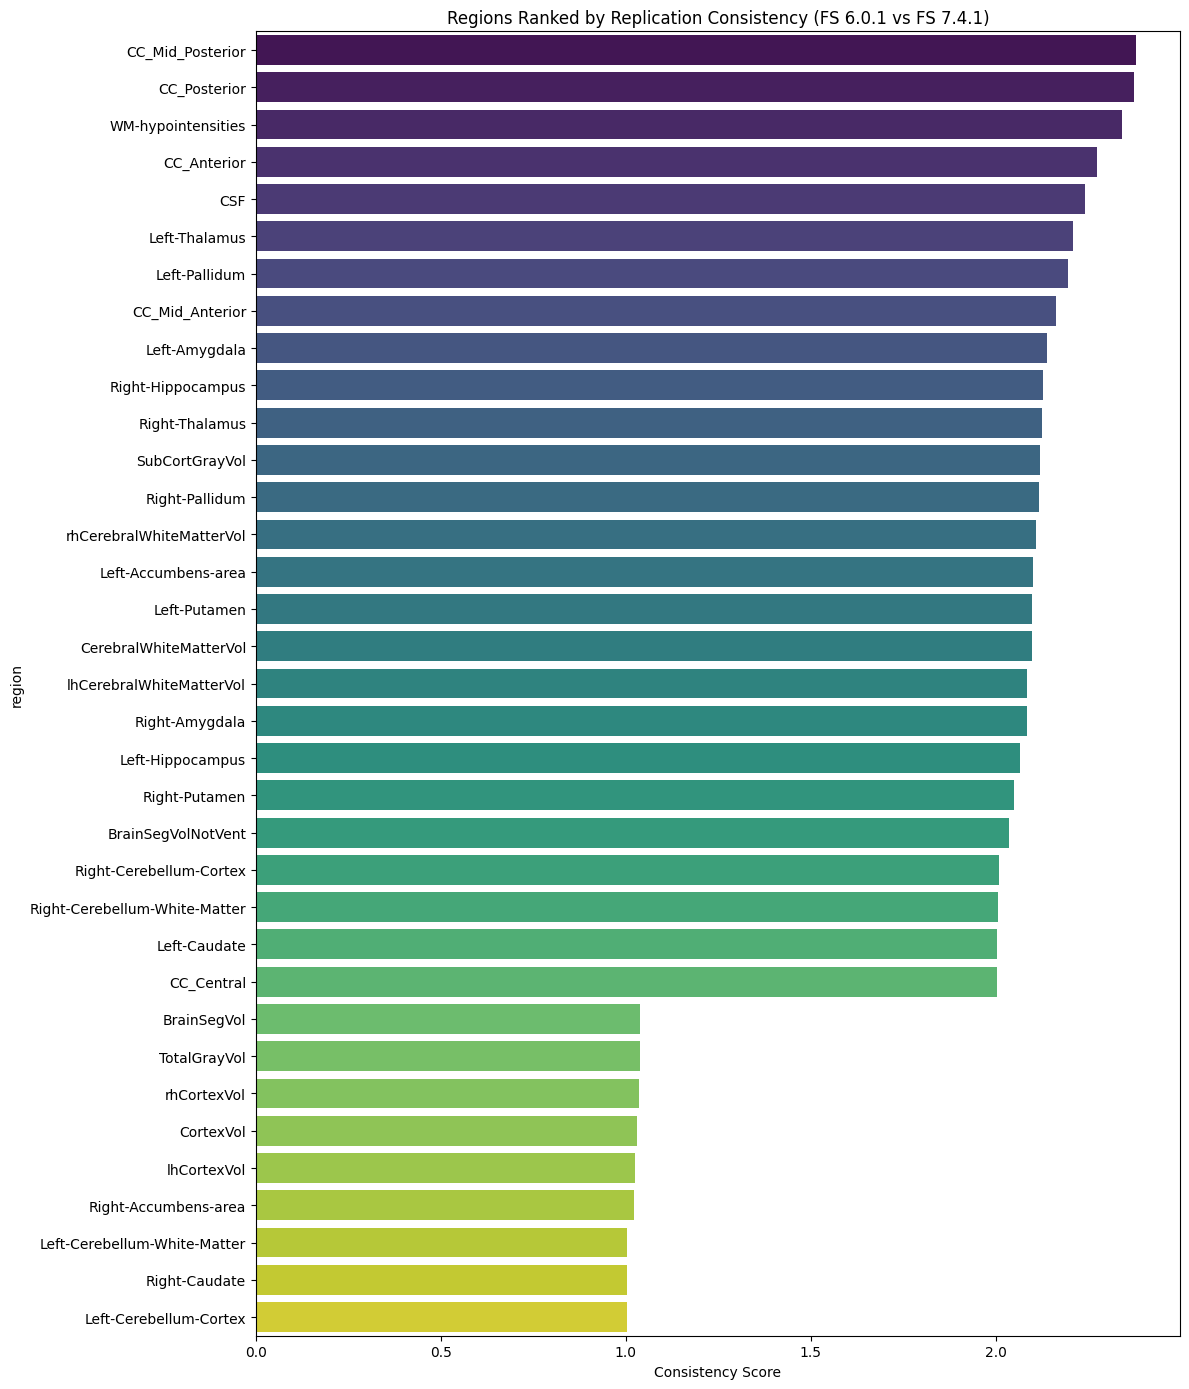

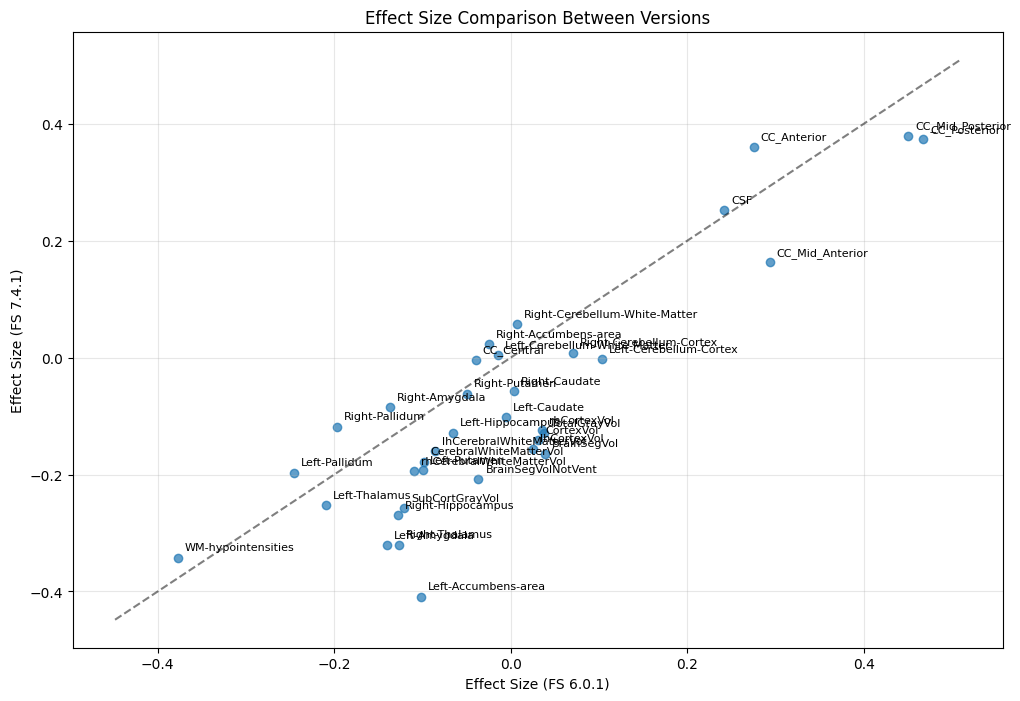

<Figure size 640x480 with 0 Axes>



COMPARING FS 7.4.1 CROSS VS LONGITUDINAL


/var/folders/y0/6krmxw152qjflvfhkn0bn4r40000gn/T/ipykernel_52684/2354296523.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=consistent_regions,



Correlation: 0.9385 (p=0.0000)
Sign consistency: 94.3%
CI overlap rate: 100.0%

Top 5 most consistent regions:
                region  sign_match  effect_magnitude  ci_overlap  \
24         CC_Anterior        True          0.356996        True   
21    CC_Mid_Posterior        True          0.345026        True   
20        CC_Posterior        True          0.342494        True   
19  WM-hypointensities        True          0.334800        True   
7        Left-Amygdala        True          0.320769        True   

    overall_score  
24       2.356996  
21       2.345026  
20       2.342494  
19       2.334800  
7        2.320769  


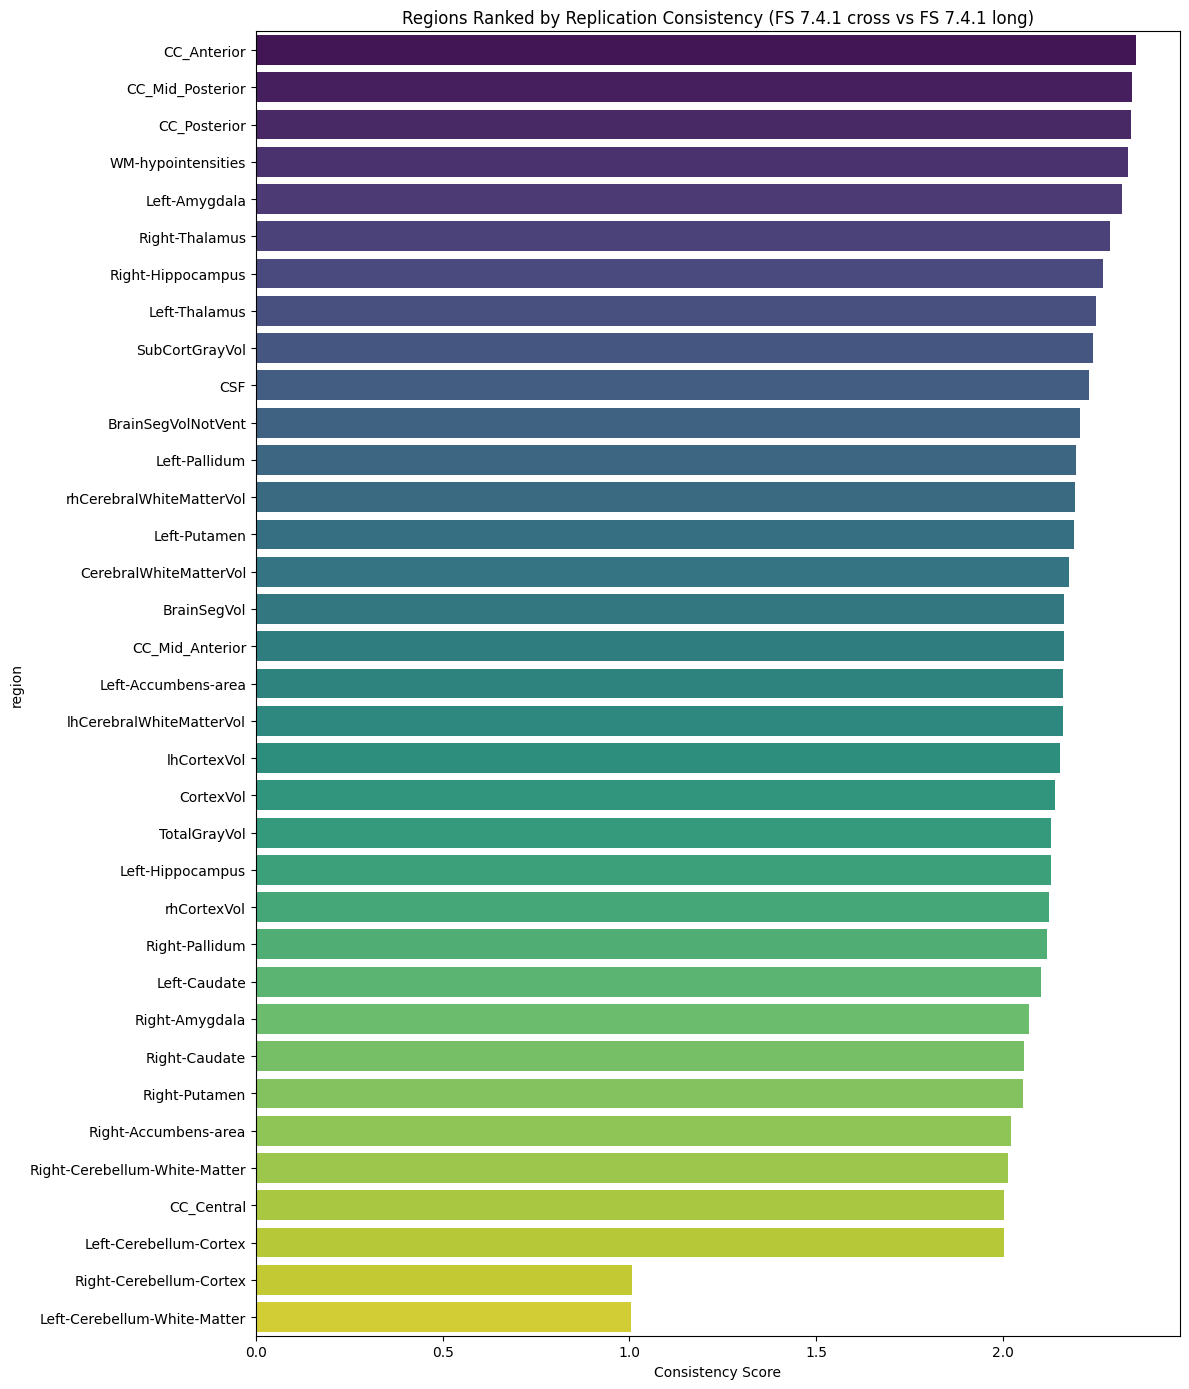

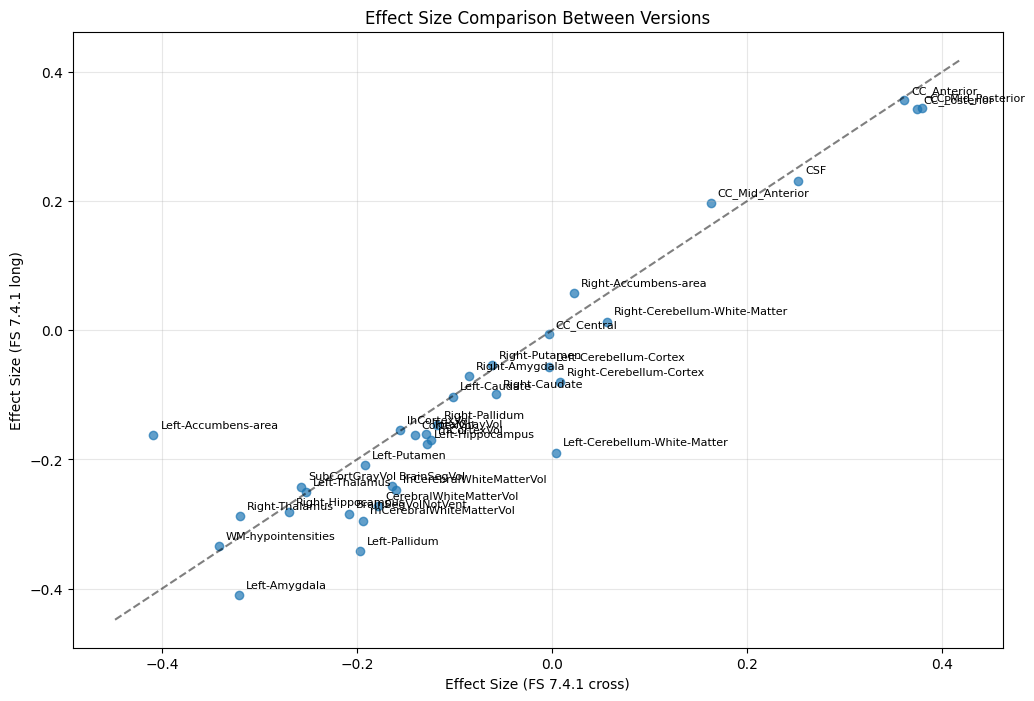

<Figure size 640x480 with 0 Axes>

In [81]:
 # Run analyses and display plots for FS 6.0.1 vs FS 7.4.1
print("COMPARING FS 6.0.1 VS FS 7.4.1")
print("=" * 50)

results_601_741 = analyze_versions(
    df_fs6_cross_etiv_normalized_group_region_mean_sd,
    df_fs7_cross_etiv_normalized_group_region_mean_sd,
    VersionAnalyzer.FS_601,
    VersionAnalyzer.FS_741
)

# Print key metrics
metrics_601_741 = results_601_741['metrics']
print(f"\nCorrelation: {metrics_601_741['correlation']:.4f} (p={metrics_601_741['correlation_p']:.4f})")
print(f"Sign consistency: {metrics_601_741['sign_consistency']*100:.1f}%")
print(f"CI overlap rate: {metrics_601_741['ci_overlap_rate']*100:.1f}%")

print("\nTop 5 most consistent regions:")
print(metrics_601_741['most_consistent_regions'].head())

# Display plots for FS 6.0.1 vs FS 7.4.1
plt.figure(results_601_741['plots']['effect_comparison'].number)
plt.show()
plt.figure(results_601_741['plots']['ranking_plot'].number)
plt.show()

# Run analyses and display plots for FS 7.4.1 cross vs long
print("\n\nCOMPARING FS 7.4.1 CROSS VS LONGITUDINAL")
print("=" * 50)

results_741_cross_long = analyze_versions(
    df_fs7_cross_etiv_normalized_group_region_mean_sd,
    df_fs7_long_etiv_normalized_group_region_mean_sd,
    VersionAnalyzer.FS_741_CROSS,
    VersionAnalyzer.FS_741_LONG
)

# Print key metrics
metrics_741_cross_long = results_741_cross_long['metrics']
print(f"\nCorrelation: {metrics_741_cross_long['correlation']:.4f} (p={metrics_741_cross_long['correlation_p']:.4f})")
print(f"Sign consistency: {metrics_741_cross_long['sign_consistency']*100:.1f}%")
print(f"CI overlap rate: {metrics_741_cross_long['ci_overlap_rate']*100:.1f}%")

print("\nTop 5 most consistent regions:")
print(metrics_741_cross_long['most_consistent_regions'].head())

# Display plots for FS 7.4.1 cross vs long
plt.figure(results_741_cross_long['plots']['effect_comparison'].number)
plt.show()
plt.figure(results_741_cross_long['plots']['ranking_plot'].number)
plt.show()

# Save plots
results_601_741['plots']['effect_comparison'].savefig('../figs/effect_sizes_601_vs_741.png')
results_601_741['plots']['ranking_plot'].savefig('../figs/region_rankings_601_vs_741.png')
results_741_cross_long['plots']['effect_comparison'].savefig('../figs/effect_sizes_741_cross_vs_long.png')
results_741_cross_long['plots']['ranking_plot'].savefig('../figs/region_rankings_741_cross_vs_long.png')

# Close plots to free memory
plt.close('all')

_Computing the generalized Mahalanobis distance between the groups IBS and HC, based on the eTIV-normalized volume of the 35 brain regions for the dataframes df_fs6_cross_etiv_normalized, df_fs7_cross_etiv_normalized, and df_fs7_long_etiv_normaliz, respectively._

In [82]:
def compute_mahalanobis_distance(df, skip_cols=['Subject', 'Group', 'eTIV']):
    """
    Compute Mahalanobis distance between IBS and HC groups
    
    Parameters:
    df: DataFrame with brain regions and Group column
    skip_cols: Columns to exclude from analysis
    
    Returns:
    dict with distance metrics and p-value
    """
    # Select features (brain regions)
    features = [col for col in df.columns if col not in skip_cols]
    
    # Split data by group
    hc_data = df[df['Group'] == 'HC'][features].values
    ibs_data = df[df['Group'] == 'IBS'][features].values
    
    # Calculate means
    hc_mean = np.mean(hc_data, axis=0)
    ibs_mean = np.mean(ibs_data, axis=0)
    mean_diff = ibs_mean - hc_mean
    
    # Pool covariance matrices
    n_hc = len(hc_data)
    n_ibs = len(ibs_data)
    hc_cov = np.cov(hc_data, rowvar=False)
    ibs_cov = np.cov(ibs_data, rowvar=False)
    
    pooled_cov = ((n_hc - 1) * hc_cov + (n_ibs - 1) * ibs_cov) / (n_hc + n_ibs - 2)
    
    # Calculate Mahalanobis distance
    try:
        inv_pooled_cov = np.linalg.inv(pooled_cov)
        mahal_dist = np.sqrt(mean_diff.dot(inv_pooled_cov).dot(mean_diff))
        
        # Compute approximate p-value (chi-square distribution)
        p_value = 1 - stats.chi2.cdf(mahal_dist**2, len(features))
        
        return {
            'distance': mahal_dist,
            'p_value': p_value,
            'n_features': len(features),
            'n_hc': n_hc,
            'n_ibs': n_ibs
        }
    except np.linalg.LinAlgError:
        print("Warning: Covariance matrix is singular. Using pseudoinverse.")
        inv_pooled_cov = np.linalg.pinv(pooled_cov)
        mahal_dist = np.sqrt(mean_diff.dot(inv_pooled_cov).dot(mean_diff))
        p_value = 1 - stats.chi2.cdf(mahal_dist**2, len(features))
        
        return {
            'distance': mahal_dist,
            'p_value': p_value,
            'n_features': len(features),
            'n_hc': n_hc,
            'n_ibs': n_ibs,
            'warning': 'Used pseudoinverse'
        }

# Compute distances for each version
results_fs6 = compute_mahalanobis_distance(df_fs6_cross_etiv_normalized)
results_fs7_cross = compute_mahalanobis_distance(df_fs7_cross_etiv_normalized)
results_fs7_long = compute_mahalanobis_distance(df_fs7_long_etiv_normalized)

# Print results
print("Mahalanobis Distances between IBS and HC groups:")
print(f"\nFreeSurfer 6.0.1:")
print(f"Distance: {results_fs6['distance']:.3f}")
print(f"P-value: {results_fs6['p_value']:.3e}")
print(f"N features: {results_fs6['n_features']}")
print(f"N subjects: HC={results_fs6['n_hc']}, IBS={results_fs6['n_ibs']}")

print(f"\nFreeSurfer 7.4.1 (cross-sectional):")
print(f"Distance: {results_fs7_cross['distance']:.3f}")
print(f"P-value: {results_fs7_cross['p_value']:.3e}")
print(f"N features: {results_fs7_cross['n_features']}")
print(f"N subjects: HC={results_fs7_cross['n_hc']}, IBS={results_fs7_cross['n_ibs']}")

print(f"\nFreeSurfer 7.4.1 (longitudinal):")
print(f"Distance: {results_fs7_long['distance']:.3f}")
print(f"P-value: {results_fs7_long['p_value']:.3e}")
print(f"N features: {results_fs7_long['n_features']}")
print(f"N subjects: HC={results_fs7_long['n_hc']}, IBS={results_fs7_long['n_ibs']}")

Mahalanobis Distances between IBS and HC groups:

FreeSurfer 6.0.1:
Distance: 1.324
P-value: 1.000e+00
N features: 35
N subjects: HC=29, IBS=49

FreeSurfer 7.4.1 (cross-sectional):
Distance: 2.092
P-value: 1.000e+00
N features: 35
N subjects: HC=29, IBS=49

FreeSurfer 7.4.1 (longitudinal):
Distance: 2.019
P-value: 1.000e+00
N features: 35
N subjects: HC=29, IBS=49


In [86]:
def compute_robust_mahalanobis_distance(df, skip_cols=['Subject', 'Group', 'eTIV']):
    """
    Compute robust Mahalanobis distance between IBS and HC groups
    using robust statistics
    """
    from scipy.stats import f
    from scipy.stats.mstats import winsorize
    
    # Select features
    features = [col for col in df.columns if col not in skip_cols]
    
    # Split data by group
    hc_data = df[df['Group'] == 'HC'][features].values
    ibs_data = df[df['Group'] == 'IBS'][features].values
    
    # Winsorize the data to reduce impact of outliers
    hc_data_win = np.array([winsorize(hc_data[:, i], limits=[0.1, 0.1]) 
                           for i in range(hc_data.shape[1])]).T
    ibs_data_win = np.array([winsorize(ibs_data[:, i], limits=[0.1, 0.1]) 
                            for i in range(ibs_data.shape[1])]).T
    
    # Calculate robust means using median
    hc_mean = np.median(hc_data_win, axis=0)
    ibs_mean = np.median(ibs_data_win, axis=0)
    mean_diff = ibs_mean - hc_mean
    
    # Calculate robust covariance using winsorized data
    n_hc = len(hc_data)
    n_ibs = len(ibs_data)
    hc_cov = np.cov(hc_data_win, rowvar=False)
    ibs_cov = np.cov(ibs_data_win, rowvar=False)
    
    # Pool covariance matrices
    pooled_cov = ((n_hc - 1) * hc_cov + (n_ibs - 1) * ibs_cov) / (n_hc + n_ibs - 2)
    
    # Calculate robust Mahalanobis distance
    inv_pooled_cov = np.linalg.pinv(pooled_cov)
    mahal_dist = np.sqrt(mean_diff.dot(inv_pooled_cov).dot(mean_diff))
    
    # Compute p-value using F-distribution
    p = len(features)
    f_stat = (n_hc * n_ibs * mahal_dist**2) / ((n_hc + n_ibs) * (n_hc + n_ibs - 2) * p)
    p_value = 1 - f.cdf(f_stat, p, n_hc + n_ibs - p - 1)
    
    return {
        'distance': mahal_dist,
        'p_value': p_value,
        'n_features': len(features),
        'n_hc': n_hc,
        'n_ibs': n_ibs,
        'f_statistic': f_stat
    }

# Compute distances for each version
results_fs6 = compute_robust_mahalanobis_distance(df_fs6_cross_etiv_normalized)
results_fs7_cross = compute_robust_mahalanobis_distance(df_fs7_cross_etiv_normalized)
results_fs7_long = compute_robust_mahalanobis_distance(df_fs7_long_etiv_normalized)

# Print results
print("Robust Mahalanobis Distances between IBS and HC groups:")
print(f"\nFreeSurfer 6.0.1:")
print(f"Distance: {results_fs6['distance']:.3f}")
print(f"P-value: {results_fs6['p_value']:.3e}")
print(f"F-statistic: {results_fs6['f_statistic']:.3f}")
print(f"N features: {results_fs6['n_features']}")
print(f"N subjects: HC={results_fs6['n_hc']}, IBS={results_fs6['n_ibs']}")

print(f"\nFreeSurfer 7.4.1 (cross-sectional):")
print(f"Distance: {results_fs7_cross['distance']:.3f}")
print(f"P-value: {results_fs7_cross['p_value']:.3e}")
print(f"F-statistic: {results_fs7_cross['f_statistic']:.3f}")
print(f"N features: {results_fs7_cross['n_features']}")
print(f"N subjects: HC={results_fs7_cross['n_hc']}, IBS={results_fs7_cross['n_ibs']}")

print(f"\nFreeSurfer 7.4.1 (longitudinal):")
print(f"Distance: {results_fs7_long['distance']:.3f}")
print(f"P-value: {results_fs7_long['p_value']:.3e}")
print(f"F-statistic: {results_fs7_long['f_statistic']:.3f}")
print(f"N features: {results_fs7_long['n_features']}")
print(f"N subjects: HC={results_fs7_long['n_hc']}, IBS={results_fs7_long['n_ibs']}")

Robust Mahalanobis Distances between IBS and HC groups:

FreeSurfer 6.0.1:
Distance: 9.348
P-value: 9.389e-01
F-statistic: 0.598
N features: 35
N subjects: HC=29, IBS=49

FreeSurfer 7.4.1 (cross-sectional):
Distance: 6.068
P-value: 1.000e+00
F-statistic: 0.252
N features: 35
N subjects: HC=29, IBS=49

FreeSurfer 7.4.1 (longitudinal):
Distance: 5.163
P-value: 1.000e+00
F-statistic: 0.183
N features: 35
N subjects: HC=29, IBS=49


Based on these results:

1. **Distances**:
   - FS 6.0.1: 9.348
   - FS 7.4.1 cross: 6.068
   - FS 7.4.1 long: 5.163

2. **P-values**:
   - All versions have very high p-values (> 0.93), indicating that none of them show statistically significant separation between IBS and HC groups

3. **F-statistics**:
   - All F-statistics are low (< 1), suggesting weak group separation

While FreeSurfer 6.0.1 does show a larger Mahalanobis distance (9.348) compared to both FreeSurfer 7.4.1 versions, we **cannot** conclude that it has "better" separation because:

1. None of the results are statistically significant (all p-values ≈ 1)
2. All F-statistics are very low
3. The larger distance in FS 6.0.1 might reflect methodological differences rather than true biological differences

**Key Conclusion**: None of the FreeSurfer versions show statistically significant separation between IBS and HC groups when considering all brain regions together in this multivariate analysis. The differences between versions are likely not meaningful given the high p-values.

We then explore alternative analyses using different statistical approaches.


**Regularized Discriminant Analysis** - Better for high-dimensional data:

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

def perform_lda_analysis(df, skip_cols=['Subject', 'Group', 'eTIV']):
    """
    Perform Linear Discriminant Analysis with cross-validation
    """
    # Prepare data
    features = [col for col in df.columns if col not in skip_cols]
    X = df[features].values
    y = (df['Group'] == 'IBS').astype(int)
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform LDA with cross-validation
    lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
    cv_scores = cross_val_score(lda, X_scaled, y, cv=5, scoring='roc_auc')
    
    # Fit LDA on full dataset for feature importance
    lda.fit(X_scaled, y)
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': np.abs(lda.coef_[0])
    }).sort_values('importance', ascending=False)
    
    return {
        'cv_scores': cv_scores,
        'mean_auc': cv_scores.mean(),
        'std_auc': cv_scores.std(),
        'feature_importance': feature_importance
    }

# Run analysis for each version
print("LDA Analysis Results:")
for name, df in [
    ("FS 6.0.1", df_fs6_cross_etiv_normalized),
    ("FS 7.4.1 cross", df_fs7_cross_etiv_normalized),
    ("FS 7.4.1 long", df_fs7_long_etiv_normalized)
]:
    results = perform_lda_analysis(df)
    print(f"\n{name}:")
    print(f"Mean AUC: {results['mean_auc']:.3f} ± {results['std_auc']:.3f}")
    print("\nTop 5 most important features:")
    print(results['feature_importance'].head())

LDA Analysis Results:

FS 6.0.1:
Mean AUC: 0.404 ± 0.113

Top 5 most important features:
               feature  importance
21    CC_Mid_Posterior    0.532847
23     CC_Mid_Anterior    0.438432
19  WM-hypointensities    0.422554
2        Left-Thalamus    0.394328
22          CC_Central    0.358870

FS 7.4.1 cross:
Mean AUC: 0.458 ± 0.154

Top 5 most important features:
                 feature  importance
8    Left-Accumbens-area    0.667845
21      CC_Mid_Posterior    0.520271
24           CC_Anterior    0.365218
18  Right-Accumbens-area    0.362362
19    WM-hypointensities    0.357326

FS 7.4.1 long:
Mean AUC: 0.462 ± 0.133

Top 5 most important features:
                 feature  importance
21      CC_Mid_Posterior    0.484909
24           CC_Anterior    0.410783
18  Right-Accumbens-area    0.408344
17        Right-Amygdala    0.391562
7          Left-Amygdala    0.382724


**Permutation-based Testing** - Non-parametric approach:

In [90]:
def permutation_test(df, n_permutations=1000, skip_cols=['Subject', 'Group', 'eTIV']):
    """
    Perform permutation test for group differences
    """
    features = [col for col in df.columns if col not in skip_cols]
    X = df[features].values
    y = (df['Group'] == 'IBS').astype(int)
    
    # Calculate observed statistic (e.g., mean difference)
    obs_diff = np.mean(X[y==1], axis=0) - np.mean(X[y==0], axis=0)
    obs_stat = np.linalg.norm(obs_diff)  # Euclidean norm of differences
    
    # Permutation test
    perm_stats = np.zeros(n_permutations)
    for i in range(n_permutations):
        y_perm = np.random.permutation(y)
        perm_diff = np.mean(X[y_perm==1], axis=0) - np.mean(X[y_perm==0], axis=0)
        perm_stats[i] = np.linalg.norm(perm_diff)
    
    p_value = np.mean(perm_stats >= obs_stat)
    
    return {
        'observed_stat': obs_stat,
        'p_value': p_value,
        'null_distribution': perm_stats
    }

# Run permutation tests
for name, df in [
    ("FS 6.0.1", df_fs6_cross_etiv_normalized),
    ("FS 7.4.1 cross", df_fs7_cross_etiv_normalized),
    ("FS 7.4.1 long", df_fs7_long_etiv_normalized)
]:
    results = permutation_test(df)
    print(f"\n{name}:")
    print(f"Observed statistic: {results['observed_stat']:.3f}")
    print(f"Permutation p-value: {results['p_value']:.3f}")


FS 6.0.1:
Observed statistic: 0.003
Permutation p-value: 0.961

FS 7.4.1 cross:
Observed statistic: 0.011
Permutation p-value: 0.567

FS 7.4.1 long:
Observed statistic: 0.015
Permutation p-value: 0.309


**Sparse Group Differences** - Looking for subset of discriminative features:

Improved Analysis Results:

FS 6.0.1:
Cross-validated ROC-AUC: 0.423 ± 0.132

Top 10 most important features:
              feature  f_score  coefficient
6        CC_Posterior 3.982800     0.269209
7    CC_Mid_Posterior 3.694449     0.454315
5  WM-hypointensities 2.589911    -0.406877
8     CC_Mid_Anterior 1.570536     0.045898
9         CC_Anterior 1.382259    -0.135212
1       Left-Pallidum 1.095240    -0.301299
3                 CSF 1.065069     0.379510
0       Left-Thalamus 0.794206    -0.339717
4      Right-Pallidum 0.706125     0.091341
2       Left-Amygdala 0.355698    -0.075674


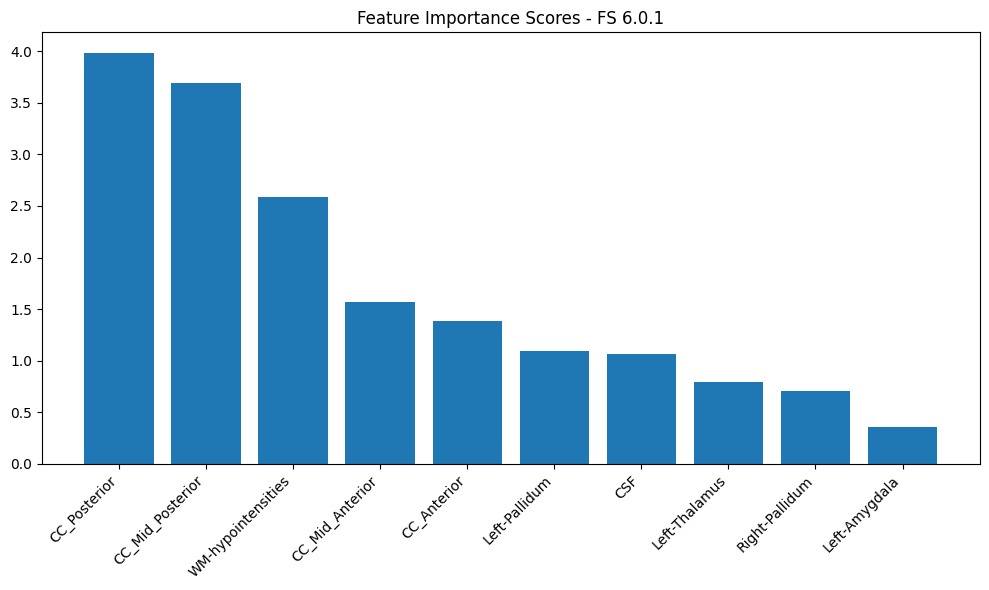

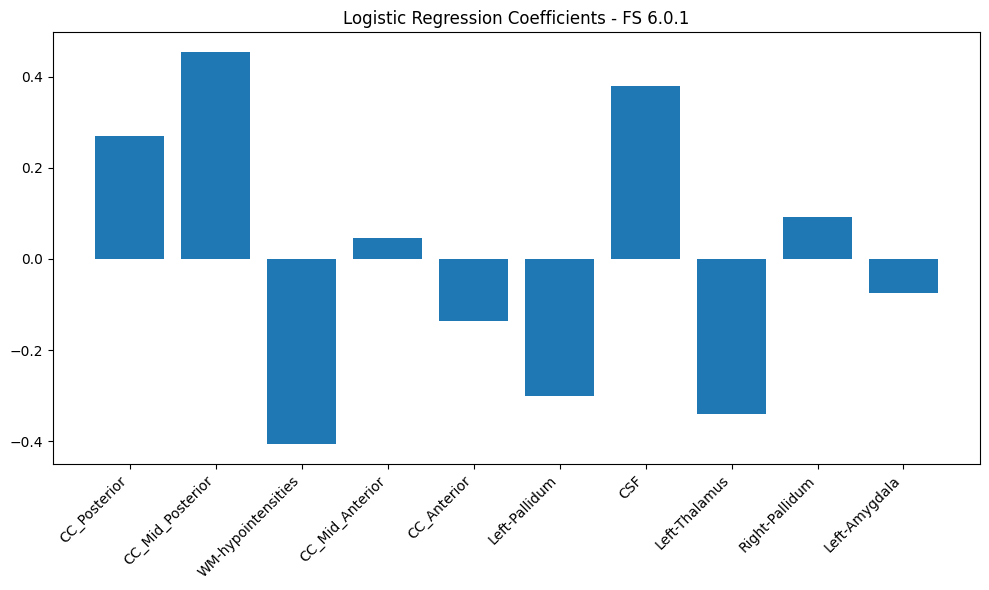


FS 7.4.1 cross:
Cross-validated ROC-AUC: 0.410 ± 0.094

Top 10 most important features:
               feature  f_score  coefficient
1  Left-Accumbens-area 3.045993    -0.641261
7     CC_Mid_Posterior 2.628668     0.633468
6         CC_Posterior 2.551414     0.066830
8          CC_Anterior 2.377584     0.112455
5   WM-hypointensities 2.132655    -0.536121
0        Left-Amygdala 1.874496    -0.090670
3       Right-Thalamus 1.867374    -0.580772
4    Right-Hippocampus 1.325177    -0.454662
9       SubCortGrayVol 1.208862     0.819914
2                  CSF 1.161353     0.442210


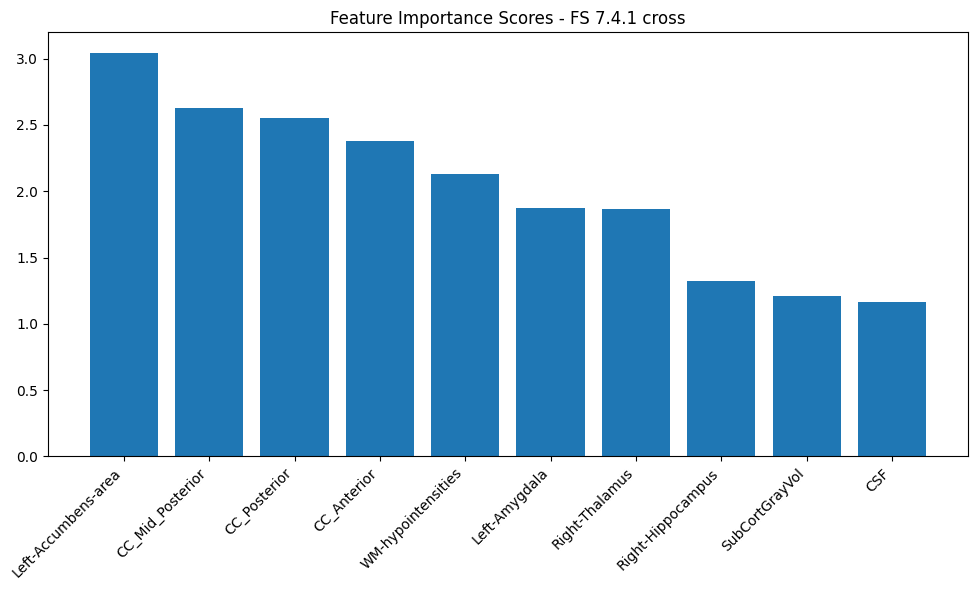

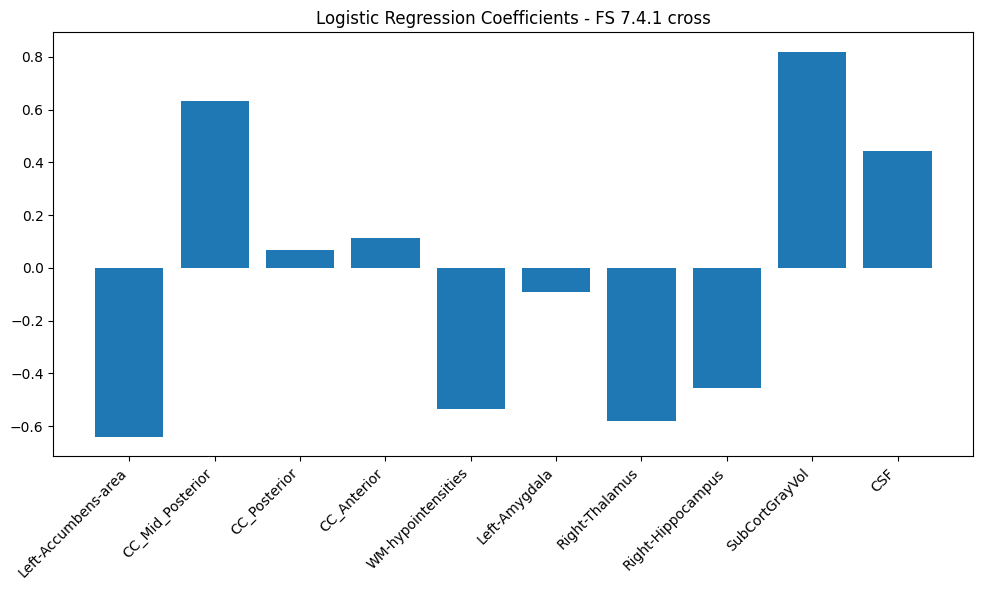


FS 7.4.1 long:
Cross-validated ROC-AUC: 0.451 ± 0.073

Top 10 most important features:
                    feature  f_score  coefficient
1             Left-Amygdala 3.062313    -0.253101
7               CC_Anterior 2.321812     0.448783
6          CC_Mid_Posterior 2.168723     0.449340
5              CC_Posterior 2.136999     0.220617
0             Left-Pallidum 2.128163    -0.171794
4        WM-hypointensities 2.042074    -0.023277
9  rhCerebralWhiteMatterVol 1.582250    -0.850836
2            Right-Thalamus 1.510742    -0.274426
8        BrainSegVolNotVent 1.474254     0.380402
3         Right-Hippocampus 1.444905    -0.203691


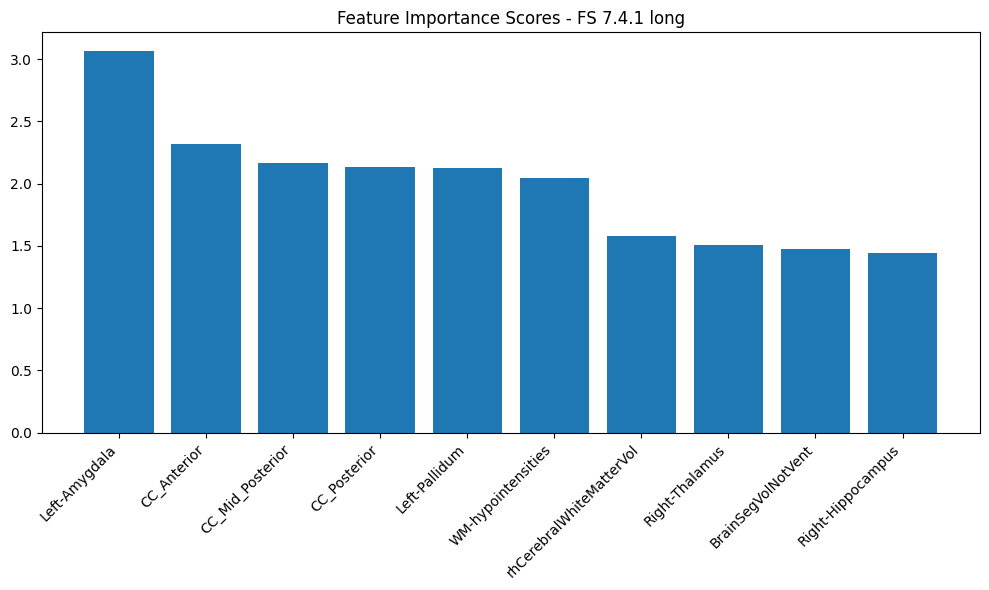

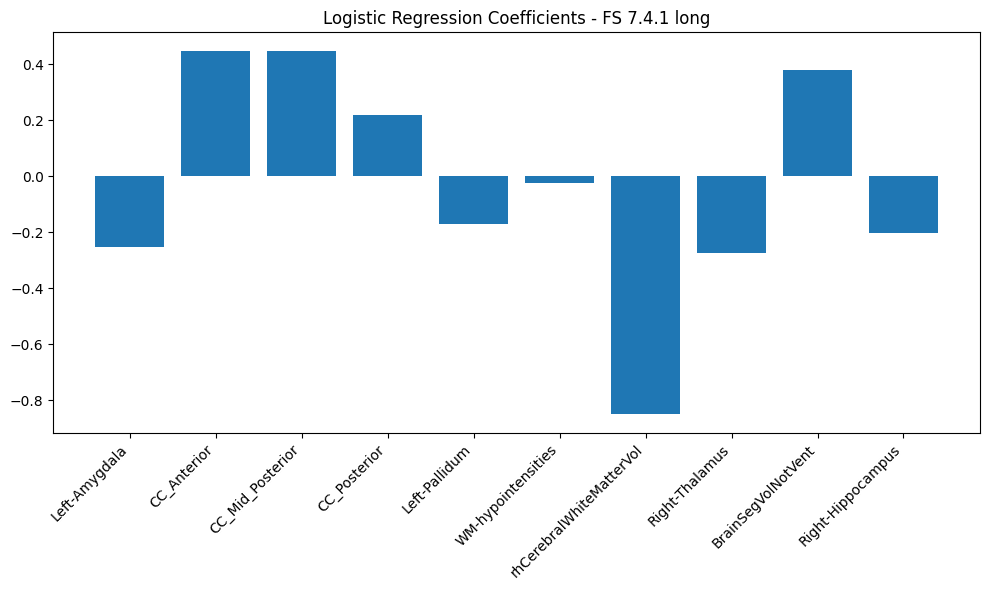

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

def improved_sparse_group_analysis(df, k=10, skip_cols=['Subject', 'Group', 'eTIV']):
    """
    Improved analysis with feature selection and better convergence handling
    
    Parameters:
    df: DataFrame with brain regions
    k: Number of features to select (default=10)
    skip_cols: Columns to exclude from analysis
    
    Returns:
    dict with results and selected features
    """
    # Prepare data
    features = [col for col in df.columns if col not in skip_cols]
    X = df[features].values
    y = (df['Group'] == 'IBS').astype(int)
    
    # Create pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectKBest(f_classif, k=k)),
        ('classifier', LogisticRegressionCV(
            penalty='l1',
            solver='liblinear',
            cv=5,
            max_iter=1000,
            random_state=42
        ))
    ])
    
    # Fit pipeline
    pipeline.fit(X, y)
    
    # Get selected features and their scores
    selected_mask = pipeline.named_steps['feature_selection'].get_support()
    selected_features = np.array(features)[selected_mask]
    feature_scores = pipeline.named_steps['feature_selection'].scores_[selected_mask]
    
    # Get coefficients for selected features
    coefficients = pipeline.named_steps['classifier'].coef_[0]
    
    # Combine into DataFrame
    feature_importance = pd.DataFrame({
        'feature': selected_features,
        'f_score': feature_scores,
        'coefficient': coefficients
    }).sort_values('f_score', ascending=False)
    
    # Calculate cross-validated performance
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
    
    return {
        'cv_scores': cv_scores,
        'mean_auc': cv_scores.mean(),
        'std_auc': cv_scores.std(),
        'feature_importance': feature_importance
    }

# Run analysis for each version
print("Improved Analysis Results:")
for name, df in [
    ("FS 6.0.1", df_fs6_cross_etiv_normalized),
    ("FS 7.4.1 cross", df_fs7_cross_etiv_normalized),
    ("FS 7.4.1 long", df_fs7_long_etiv_normalized)
]:
    print(f"\n{name}:")
    results = improved_sparse_group_analysis(df)
    
    print(f"Cross-validated ROC-AUC: {results['mean_auc']:.3f} ± {results['std_auc']:.3f}")
    print("\nTop 10 most important features:")
    print(results['feature_importance'].head(10))
    
    # Additional visualization
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(results['feature_importance'])), 
            results['feature_importance']['f_score'])
    plt.xticks(range(len(results['feature_importance'])), 
               results['feature_importance']['feature'], 
               rotation=45, ha='right')
    plt.title(f'Feature Importance Scores - {name}')
    plt.tight_layout()
    plt.show()
    
    # Plot coefficient values
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(results['feature_importance'])), 
            results['feature_importance']['coefficient'])
    plt.xticks(range(len(results['feature_importance'])), 
               results['feature_importance']['feature'], 
               rotation=45, ha='right')
    plt.title(f'Logistic Regression Coefficients - {name}')
    plt.tight_layout()
    plt.show()


To evaluate the discriminative power of brain volumetric differences between IBS patients and healthy controls (HC) across FreeSurfer versions (6.0.1, 7.4.1 cross-sectional, and 7.4.1 longitudinal), we employed a machine learning approach combining feature selection and logistic regression. The analysis pipeline included standardization of features, selection of the most informative brain regions using F-scores, and L1-regularized logistic regression with cross-validation to assess classification performance. This approach was chosen to handle the high-dimensional nature of brain volume data while identifying the most relevant anatomical features. Results showed that none of the FreeSurfer versions achieved above-chance classification performance (ROC-AUC: FS 6.0.1 = 0.423 ± 0.132; FS 7.4.1 cross = 0.410 ± 0.094; FS 7.4.1 long = 0.451 ± 0.073), indicating that brain volume differences alone are insufficient to reliably distinguish between IBS and HC groups. While the FS 7.4.1 longitudinal pipeline demonstrated slightly better and more stable performance, all versions consistently identified corpus callosum regions, white matter hypointensities, and certain subcortical structures (amygdala, thalamus) as potentially relevant features, suggesting these regions might warrant targeted investigation in future studies using additional imaging metrics beyond volumetric measures.

In [94]:
# Create a function to generate a LaTeX table comparing the normalized volumes 
# between FS 7.4.1 cross-sectional and FS 7.4.1 longitudinal stream, grouped by HC and IBS

def create_comparison_table(df7_cross, df7_long):
    # Skip these columns in comparison
    skip_cols = ['Subject', 'Group', 'eTIV']
    
    # Initialize lists to store results
    rows = []
    
    for col in df7_cross.columns:
        if col not in skip_cols:
            # Calculate stats for HC group
            hc_7_cross_stats = df7_cross[df7_cross['Group'] == 'HC'][col].agg(['mean', 'std'])
            hc_7_long_stats = df7_long[df7_long['Group'] == 'HC'][col].agg(['mean', 'std'])
            
            # Calculate stats for IBS group
            ibs_7_cross_stats = df7_cross[df7_cross['Group'] == 'IBS'][col].agg(['mean', 'std'])
            ibs_7_long_stats = df7_long[df7_long['Group'] == 'IBS'][col].agg(['mean', 'std'])
            
            # Add row to results
            rows.append([
                col,
                f"{hc_7_cross_stats['mean']:.6f}",
                f"{hc_7_cross_stats['std']:.6f}",
                f"{ibs_7_cross_stats['mean']:.6f}",
                f"{ibs_7_cross_stats['std']:.6f}",
                f"{hc_7_long_stats['mean']:.6f}",
                f"{hc_7_long_stats['std']:.6f}",
                f"{ibs_7_long_stats['mean']:.6f}",
                f"{ibs_7_long_stats['std']:.6f}"
            ])
    
    # Create LaTeX table
    latex_table = "\\begin{table}[H]\n\\setlength{\\tabcolsep}{5pt}\n\\scriptsize\n\\centering\n\\caption{Comparison of Brain Region Volumes in Bergen cohort, FS 7.4.1 cross-sectional vs. FS 7.4.1 longitudinal stream}\n"
    latex_table += "\\begin{tabular}{l|cc|cc|cc|cc}\n\\hline\n"
    latex_table += " & \\multicolumn{4}{c|}{FS 7.4.1 cross-sectional} & \\multicolumn{4}{c}{FS 7.4.1 longitudinal stream} \\\\\n"
    latex_table += " & \\multicolumn{2}{c|}{HC (N=29)} & \\multicolumn{2}{c|}{IBS (N=49)} & \\multicolumn{2}{c|}{HC (N=29)} & \\multicolumn{2}{c}{IBS (N=49)} \\\\\n"
    latex_table += "Brain Region & Mean & SD & Mean & SD & Mean & SD & Mean & SD \\\\\n\\hline\n"
    
    for row in rows:
        latex_table += " & ".join(row) + " \\\\\n"
    
    latex_table += "\\hline\n\\end{tabular}\n\\label{tab:version_comparison}\n\\end{table}"
    
    return latex_table

# Generate the table
table = create_comparison_table(df_fs7_cross_etiv_normalized, df_fs7_long_etiv_normalized)
print(table)

\begin{table}[H]
\setlength{\tabcolsep}{5pt}
\scriptsize
\centering
\caption{Comparison of Brain Region Volumes in Bergen cohort, FS 7.4.1 cross-sectional vs. FS 7.4.1 longitudinal stream}
\begin{tabular}{l|cc|cc|cc|cc}
\hline
 & \multicolumn{4}{c|}{FS 7.4.1 cross-sectional} & \multicolumn{4}{c}{FS 7.4.1 longitudinal stream} \\
 & \multicolumn{2}{c|}{HC (N=29)} & \multicolumn{2}{c|}{IBS (N=49)} & \multicolumn{2}{c|}{HC (N=29)} & \multicolumn{2}{c}{IBS (N=49)} \\
Brain Region & Mean & SD & Mean & SD & Mean & SD & Mean & SD \\
\hline
Left-Cerebellum-White-Matter & 0.010603 & 0.000932 & 0.010607 & 0.001027 & 0.010888 & 0.001076 & 0.010688 & 0.001044 \\
Left-Cerebellum-Cortex & 0.038066 & 0.003526 & 0.038056 & 0.003684 & 0.037438 & 0.003633 & 0.037232 & 0.003575 \\
Left-Thalamus & 0.005236 & 0.000522 & 0.005114 & 0.000458 & 0.005385 & 0.000517 & 0.005262 & 0.000473 \\
Left-Caudate & 0.002346 & 0.000283 & 0.002317 & 0.000294 & 0.002506 & 0.000313 & 0.002474 & 0.000315 \\
Left-Putamen & 0.00

In [95]:
# Save the table to a LaTeX file
with open('../latex/tables/fs7_cross_vs_fs7_long_version_comparison_table.tex', 'w') as f:
    f.write(table)


In [96]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

print(f"Mean eTIV FS 7.4.1 cross-sectional:\n{df_fs7_cross_etiv_normalized.groupby('Group')['eTIV'].mean()}")
print(f"\nStd eTIV FS 7.4.1 cross-sectional:\n{df_fs7_cross_etiv_normalized.groupby('Group')['eTIV'].std()}")
print(f"\nMean eTIV FS 7.4.1 longitudinal stream:\n{df_fs7_long_etiv_normalized.groupby('Group')['eTIV'].mean()}")
print(f"\nStd eTIV FS 7.4.1 longitudinal stream:\n{df_fs7_long_etiv_normalized.groupby('Group')['eTIV'].std()}")


Mean eTIV FS 7.4.1 cross-sectional:
Group
HC    1494273.2
IBS   1462310.8
Name: eTIV, dtype: float64

Std eTIV FS 7.4.1 cross-sectional:
Group
HC    171472.3
IBS   144145.1
Name: eTIV, dtype: float64

Mean eTIV FS 7.4.1 longitudinal stream:
Group
HC    1492943.7
IBS   1464197.2
Name: eTIV, dtype: float64

Std eTIV FS 7.4.1 longitudinal stream:
Group
HC    171477.7
IBS   143328.1
Name: eTIV, dtype: float64


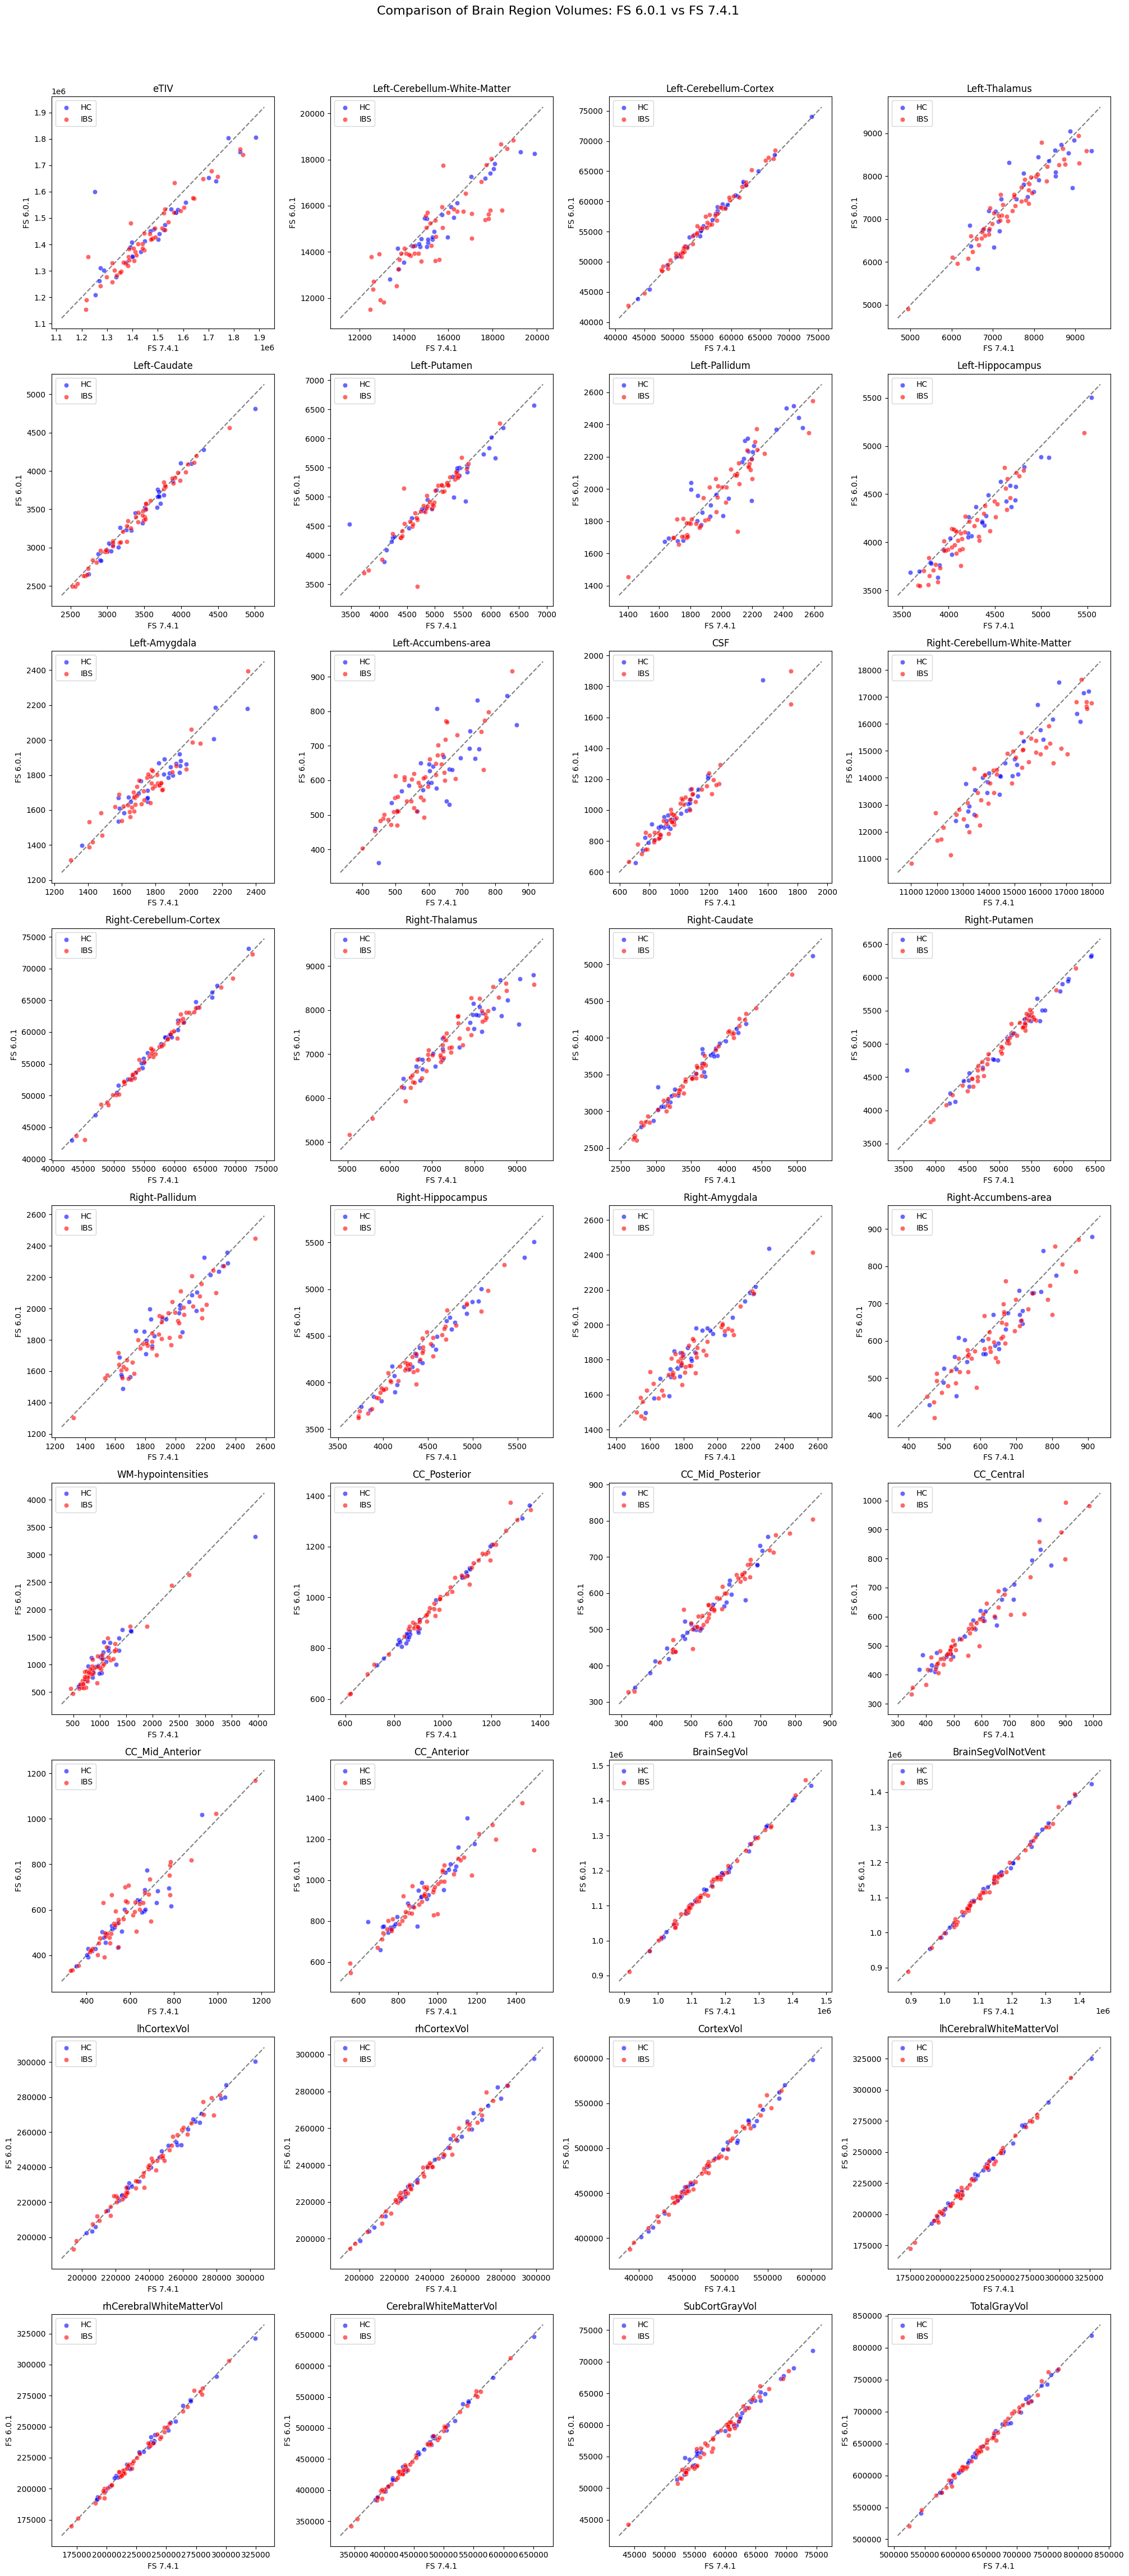

In [97]:
# Set up the plotting parameters
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Get list of brain regions (excluding non-volume columns)
brain_regions = [col for col in df_fs6_cross.columns 
                if col not in ['Subject', 'Group']]

n_plots_per_row = 4
# Calculate number of rows needed
n_rows = (len(brain_regions) + n_plots_per_row - 1) // n_plots_per_row

# Create a large figure
fig = plt.figure(figsize=(20, 5*n_rows))
gs = GridSpec(n_rows, n_plots_per_row, figure=fig)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Create scatter plot for each brain region
for idx, region in enumerate(brain_regions):
    row = idx // n_plots_per_row
    col = idx % n_plots_per_row
    ax = fig.add_subplot(gs[row, col])
    
    # Plot HC group
    sns.scatterplot(data=df_fs6_cross[df_fs6_cross['Group']=='HC'], 
                   x=df_fs7_cross[df_fs7_cross['Group']=='HC'][region],
                   y=df_fs6_cross[df_fs6_cross['Group']=='HC'][region],
                   label='HC', color='blue', alpha=0.6)
    
    # Plot IBS group
    sns.scatterplot(data=df_fs6_cross[df_fs6_cross['Group']=='IBS'],
                   x=df_fs7_cross[df_fs7_cross['Group']=='IBS'][region],
                   y=df_fs6_cross[df_fs6_cross['Group']=='IBS'][region],
                   label='IBS', color='red', alpha=0.6)
    
    # Add identity line
    lims = [
        min(ax.get_xlim()[0], ax.get_ylim()[0]),
        max(ax.get_xlim()[1], ax.get_ylim()[1]),
    ]
    ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0)
    
    # Labels and title
    ax.set_xlabel('FS 7.4.1')
    ax.set_ylabel('FS 6.0.1')
    ax.set_title(region)
    ax.legend()

plt.suptitle('Comparison of Brain Region Volumes: FS 6.0.1 vs FS 7.4.1', 
            fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

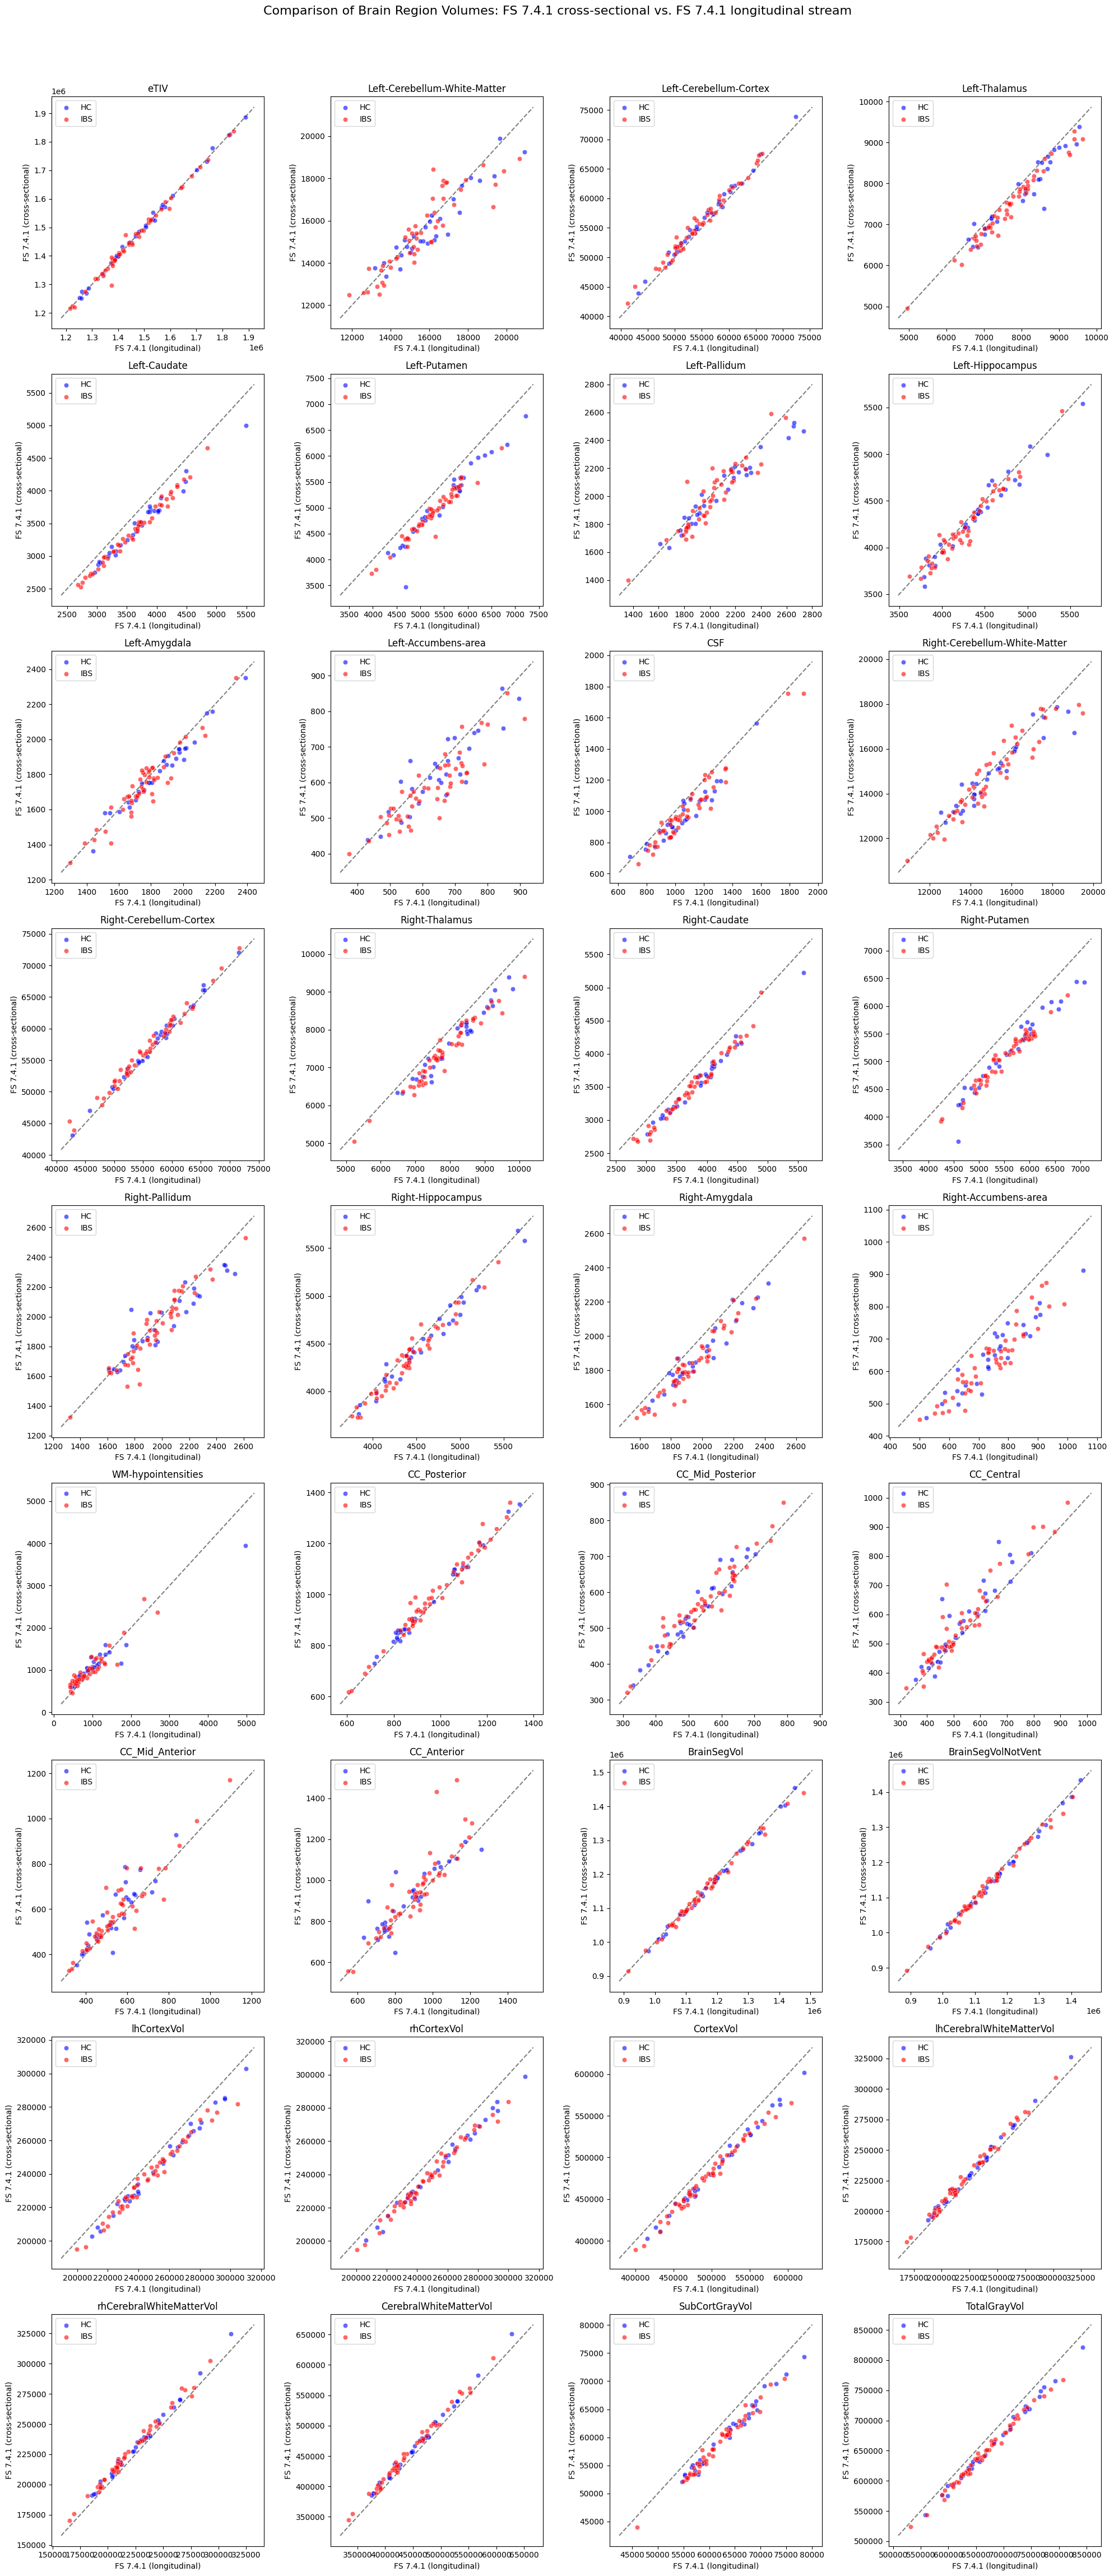

In [98]:
# Set up the plotting parameters
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Get list of brain regions (excluding non-volume columns)
brain_regions = [col for col in df_fs7_cross.columns 
                if col not in ['Subject', 'Group']]

n_plots_per_row = 4
# Calculate number of rows needed
n_rows = (len(brain_regions) + n_plots_per_row - 1) // n_plots_per_row

# Create a large figure
fig = plt.figure(figsize=(20, 5*n_rows))
gs = GridSpec(n_rows, n_plots_per_row, figure=fig)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Create scatter plot for each brain region
for idx, region in enumerate(brain_regions):
    row = idx // n_plots_per_row
    col = idx % n_plots_per_row
    ax = fig.add_subplot(gs[row, col])
    
    # Plot HC group
    sns.scatterplot(data=df_fs7_cross[df_fs7_cross['Group']=='HC'], 
                   x=df_fs7_long[df_fs7_long['Group']=='HC'][region],
                   y=df_fs7_cross[df_fs7_cross['Group']=='HC'][region],
                   label='HC', color='blue', alpha=0.6)
    
    # Plot IBS group
    sns.scatterplot(data=df_fs7_cross[df_fs7_cross['Group']=='IBS'],
                   x=df_fs7_long[df_fs7_long['Group']=='IBS'][region],
                   y=df_fs7_cross[df_fs7_cross['Group']=='IBS'][region],
                   label='IBS', color='red', alpha=0.6)
    
    # Add identity line
    lims = [
        min(ax.get_xlim()[0], ax.get_ylim()[0]),
        max(ax.get_xlim()[1], ax.get_ylim()[1]),
    ]
    ax.plot(lims, lims, 'k--', alpha=0.5, zorder=0)
    
    # Labels and title
    ax.set_xlabel('FS 7.4.1 (longitudinal)')
    ax.set_ylabel('FS 7.4.1 (cross-sectional)')
    ax.set_title(region)
    ax.legend()

plt.suptitle('Comparison of Brain Region Volumes: FS 7.4.1 cross-sectional vs. FS 7.4.1 longitudinal stream', 
            fontsize=16, y=1.02)
plt.tight_layout()
plt.show()